In [58]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
import numpy as np

In [59]:
weather_data = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')
gen_data = pd.read_csv('../data/Plant_1_Generation_Data.csv')

In [60]:
weather_data['DATE_TIME']= pd.to_datetime(weather_data['DATE_TIME'])
gen_data['DATE_TIME']= pd.to_datetime(gen_data['DATE_TIME'], format='%d-%m-%Y %H:%M')

### AK 
<font color='red'>creating an integer growing index for the time of the day=minutes passed since 00:00</font>

In [61]:
weather_data['DAY'] = pd.DatetimeIndex(weather_data['DATE_TIME']).dayofyear
weather_data['TIME'] = weather_data.DATE_TIME.dt.hour * 60 + weather_data.DATE_TIME.dt.minute
weather_data['HOUR'] = weather_data.DATE_TIME.dt.hour
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,TIME,HOUR
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,136,15,0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,136,30,0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,136,45,0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,136,60,1


In [62]:
gen_data['DAY'] = pd.DatetimeIndex(gen_data['DATE_TIME']).dayofyear
gen_data['TIME'] = gen_data.DATE_TIME.dt.hour * 60 + gen_data.DATE_TIME.dt.minute
gen_data['HOUR'] = gen_data.DATE_TIME.dt.hour
gen_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY,TIME,HOUR
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,136,0,0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,136,0,0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,136,0,0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,136,0,0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,136,0,0


### AK 
<font color='red'>changed to hour below to keep the original level of granularity, without aggregation</font>

In [63]:
#Hourly maximum irradiation, module and ambient temp
agg_h_irr = weather_data.groupby(weather_data['TIME']).agg({'IRRADIATION': 'max',
                                                            'MODULE_TEMPERATURE': 'max',
                                                            'AMBIENT_TEMPERATURE': 'max'})

#agg_h_irr['TIME']=agg_h_irr.index
agg_h_irr.head()

,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE
TIME,,,
0,0.0,22.857507,25.184316
15,0.0,22.761668,25.084589
30,0.0,22.666227,24.935753
45,0.0,22.743333,24.846130
60,0.0,22.723669,24.621525


In [64]:
merged_df = pd.merge(gen_data, weather_data, how='inner', on='DATE_TIME')
merged_df.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY_x,TIME_x,HOUR_x,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY_y,TIME_y,HOUR_y
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,136,0,0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,136,0,0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,136,0,0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,136,0,0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,136,0,0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,0


## Overplot irradiation profiles for many days

Hourly irradiation grouped by days, and hourly maximum irradiation

### AK 
<font color='red'>just plotted with a style that was easier for me to see. Note that plotting with higher granularity (15 mins) allows to see more details of the profile. For example the profile of day 136 or 137 is more clearly visible to be different</font>

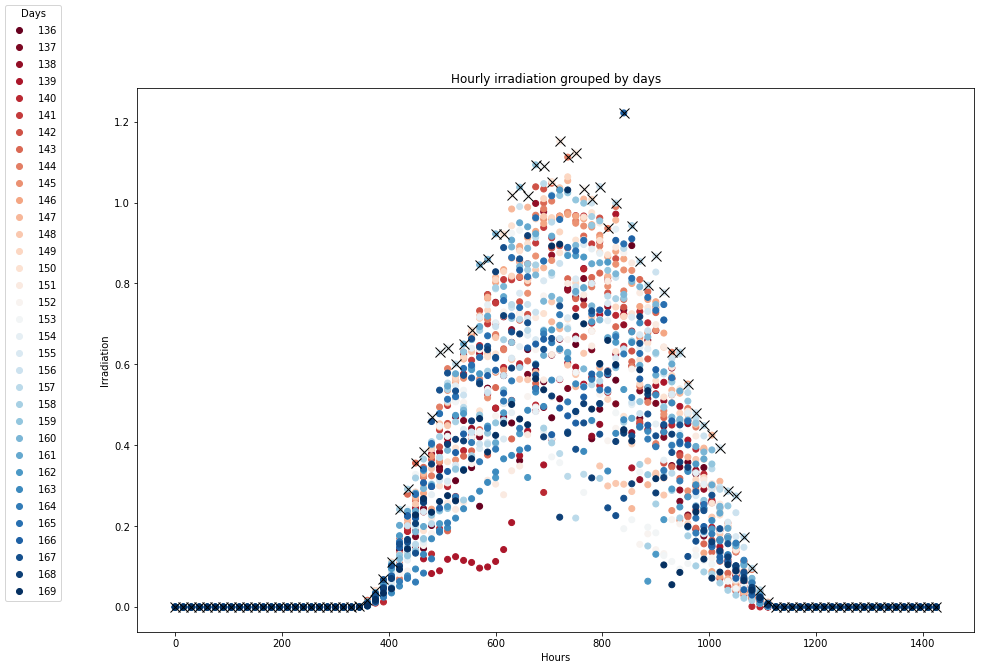

In [66]:
ax=plt.figure(figsize=(15, 10))
n=plt.scatter(weather_data['TIME'], weather_data['IRRADIATION'], c=weather_data['DAY'], cmap='RdBu')
plt.plot(agg_h_irr.index, agg_h_irr['IRRADIATION'], 'kx', markersize=10 )
plt.ylabel('Irradiation')
plt.xlabel('Hours')
plt.title('Hourly irradiation grouped by days')
ax.legend(*n.legend_elements(num=20), loc="upper left", title="Days")

NameError: name 'agg_df' is not defined

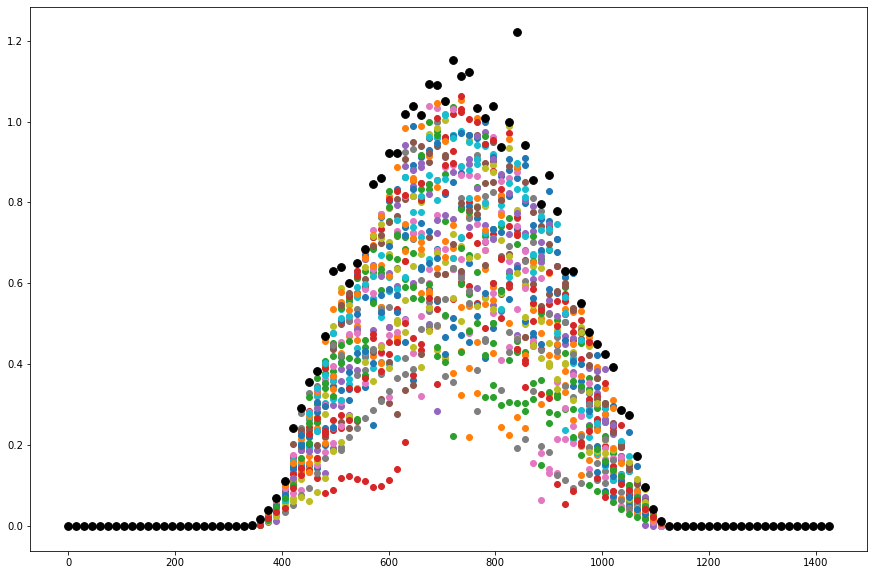

In [25]:
ax=plt.figure(figsize=(15, 10))
for a, b in weather_data.groupby(weather_data['DAY']):
    n=[plt.scatter(b['TIME'], b['IRRADIATION'])]
m=[plt.scatter(agg_h_irr.index, agg_h_irr['IRRADIATION'], color='black', s = 60)]
legend1 = plt.legend(agg_df['DAY'], loc='upper left')
legend2 = plt.legend(m,['hourly max irradiation'], loc='upper right')
ax.add_artist(legend1)
plt.ylabel('Irradiation')
plt.xlabel('Hours')
plt.title('Hourly irradiation grouped by days')
plt.show()

#### Measure of cloudiness of the day 136

#### Plot a distribution (histogram) of C_day values. 

In [275]:
print(weather_data.count()[0])
weather_maxirr = pd.merge(weather_data, agg_h_irr, how='inner', on='TIME', suffixes=('', '_max'))
print(weather_maxirr.count()[0])
weather_maxirr.head()

3182
3182


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,TIME,HOUR,half_hour,IRRADIATION_max,MODULE_TEMPERATURE_max,AMBIENT_TEMPERATURE_max
0,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,0,0.0,0.0,22.857507,25.184316
1,2020-05-17,4135001,HmiyD2TTLFNqkNe,24.170166,21.631490,0.0,138,0,0,0.0,0.0,22.857507,25.184316
2,2020-05-18,4135001,HmiyD2TTLFNqkNe,21.155691,20.599400,0.0,139,0,0,0.0,0.0,22.857507,25.184316
3,2020-05-19,4135001,HmiyD2TTLFNqkNe,22.610982,20.609906,0.0,140,0,0,0.0,0.0,22.857507,25.184316
4,2020-05-20,4135001,HmiyD2TTLFNqkNe,22.465285,20.111123,0.0,141,0,0,0.0,0.0,22.857507,25.184316


### AK 
<font color='red'>maybe a slightly fast way to do the calculation and plot</font>

In [276]:
weather_maxirr['irradiation_offset_from_max']=(weather_maxirr['IRRADIATION_max']-weather_maxirr['IRRADIATION'])**2.
C_day_list=weather_maxirr.groupby('DAY').sum()['irradiation_offset_from_max']

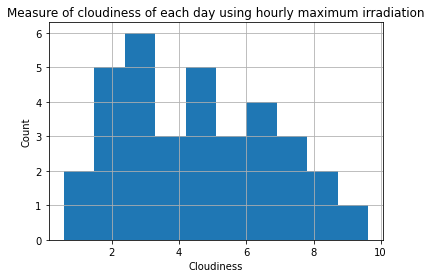

In [277]:
C_day_list.hist()
plt.ylabel('Count')
plt.xlabel('Cloudiness')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation')
plt.show() 

### AK 
<font color='red'>I think there was an error in the calculation. You had (b.IRRADIATION_y-b.loc[ind, 'IRRADIATION'])**2, and it seems it wasn't taking the minutewise difference. With the modification the plot below is equal to the one I made</font>

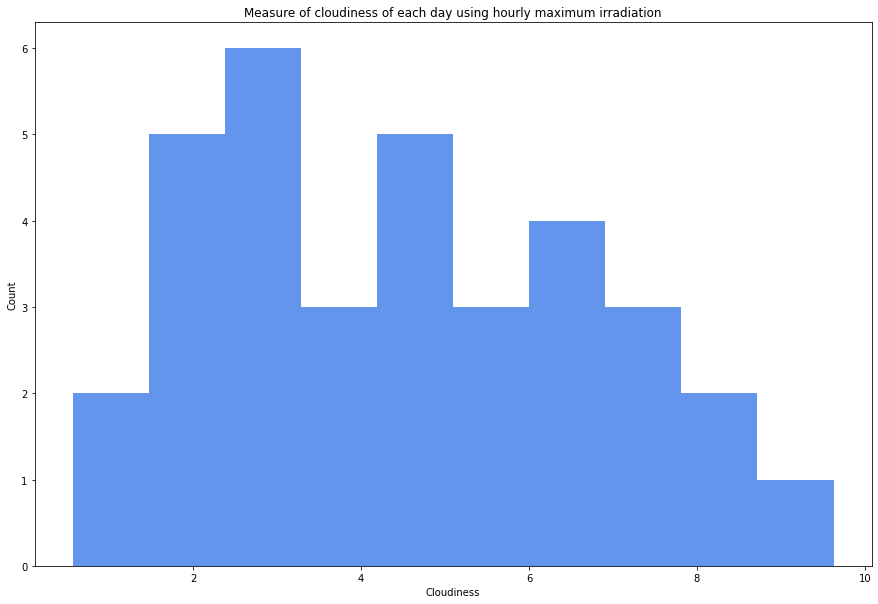

In [78]:
C_DAYlist=[]
plt.figure(figsize=(15, 10))
for a, b in weather_maxirr.groupby(weather_maxirr['DAY']):
    ind = b[b['DAY']==a].index.values
    C = (b.IRRADIATION_max-b['IRRADIATION'])**2
    C_day = C.sum()
    C_DAYlist.append(C_day)
plt.hist(C_DAYlist, color='cornflowerblue')
plt.ylabel('Count')
plt.xlabel('Cloudiness')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation')
plt.show() 

In [81]:
np.mean(C_DAYlist)+2*np.std(C_DAYlist)

9.068993629728581

As far as I understand, this histogram shows the number of times each value of cloudiness happens in our data, and it does not show anthing related to the days, so I don't think we will be able to know the level of cloudiness of each day. So I will leave the barplots too, in case we need to look at the daily cloudiness measure.

I will do the same for the rest of the points too

### AK 
<font color='red'>
you are right it does not show you any info about the day that each value corresponds to. if you want to see also the day information then the bar plot or even simple scatter plots like below are also fine.<br/>
The main reason for using the histogram, is for seeing how is approximately the value distributed. <b>You can see outliers right away if there are such</b>. For example in the bar plot there is a very small value of cloudiness on day 142 and it might seem that its very different from others, but if you see the histogram you can see that everything is quite continuous, there are no extremely different values.<br/>
So here are some things I can see from this distribution plot<br/>
1. there are no evident outliers (days differing very much by their cloudiness). this could also be natural<br/>
2. The distribution shape is quite round and not very assymmetric, but there is some assymmetry. For example it is skewed towards smaller values. it means there were less cloudy days in this period then sunny days  (and this makes sens, since they correspond to summertime)<br/>
3. I can see right away that the most cloudy value is near 10 and the least cloudy near 1 (not 0!)and that the most likely level of cloudiness is around 2-3, with a mean around 4-5. <br/>
So seeing a distibution helps you get some intuition about this new quantity that we introduced (or any other quantity that you might be studying).<br/>
All the plots are useful for exploration, but each one gives a certain type of information. See below what the bar plot can be very useful for. A scatter plot could also be used with similar scope as bar plot. <br/>

</font>

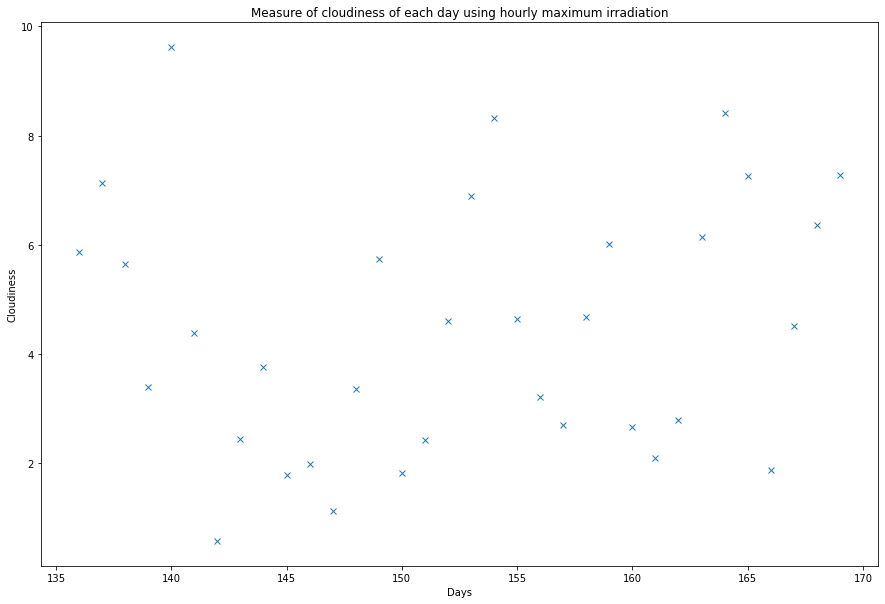

In [90]:
plt.figure(figsize=(15, 10))
plt.plot(weather_maxirr.DAY.unique(), C_day_list , 'x')
plt.ylabel('Cloudiness')
plt.xlabel('Days')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation')
plt.show()

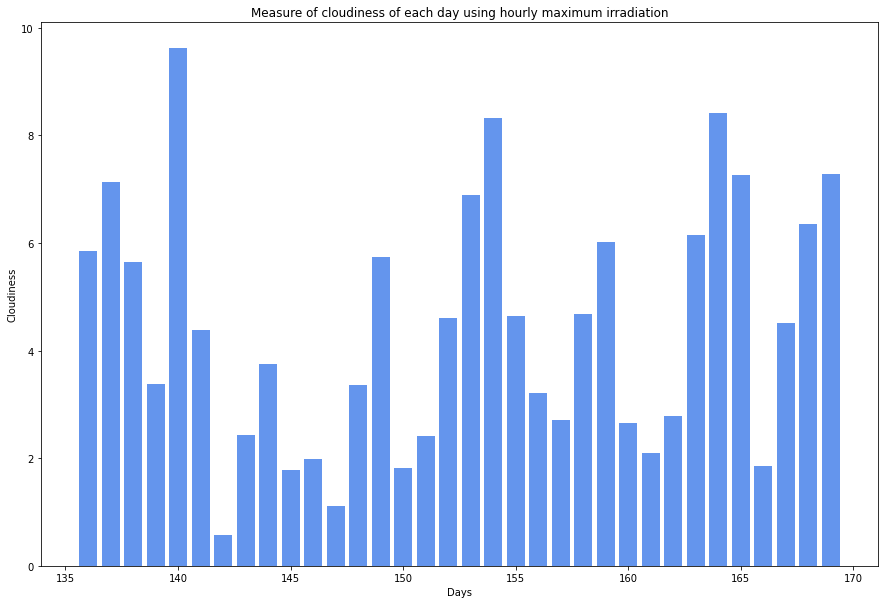

In [86]:
plt.figure(figsize=(15, 10))
#for a, b in weather_maxirr.groupby(weather_maxirr['DAY']):
#    ind = b[b['DAY']==a].index.values
#    C = (b.IRRADIATION_y-b.loc[ind, 'IRRADIATION_x'])**2
#    C_day = C.sum()
plt.bar(weather_maxirr.DAY.unique(),C_day_list ,align='center', color='cornflowerblue')
plt.ylabel('Cloudiness')
plt.xlabel('Days')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation')
plt.show()

### AK 
<font color='red'>
What is nice about this plot and the scatter plot above is that you can see how the cloudiness of the days has been varying in time. 136 to 141 are relatively cloudy then the cloudiness goes down near 145-147 its minimum and then goes up again and so on. So this plot is definitely more speaking in the sens of seeing time evolution. If there were extended periods of cloudiness of clear skies you'd see that right away with a bar plot or scatter plot and you wouldn't see it with a distribution<br/>
</font>

#### In a similar manner you can calculate a correlation value of the irradiation profile of every day with the max curve. Plot a histogram of the correlation coefficients.

I don't know why I dat a problem with this graph earlier, it is working fine now :)

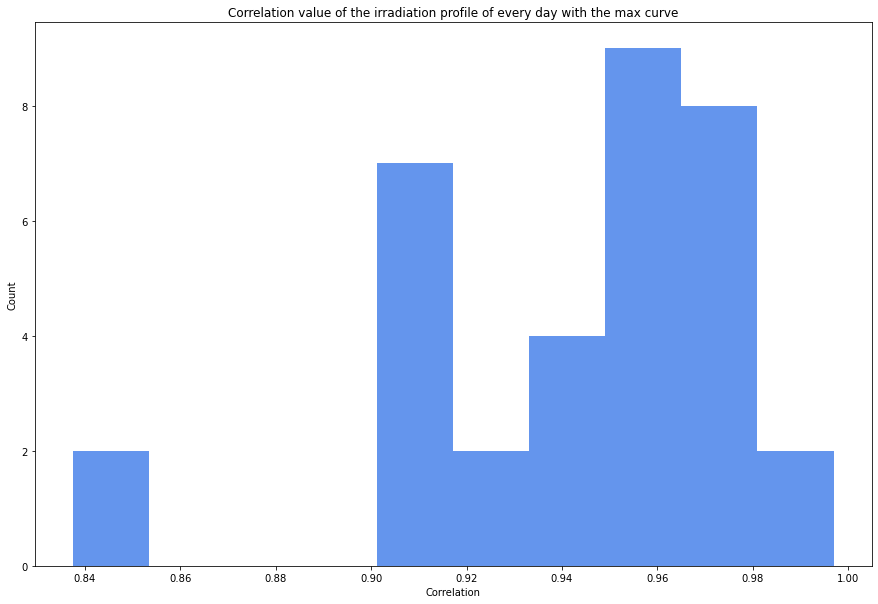

In [97]:
irr_c = []
for a, b in weather_maxirr.groupby(weather_maxirr['DAY']):
    c = b['IRRADIATION'].corr(b['IRRADIATION_max'])
    irr_c.append(c)

irr_corr = pd.DataFrame(data=np.array(irr_c), columns=['CORRELATION'])
irr_corr['DAY'] = weather_data['DAY'].unique()
plt.figure(figsize=(15, 10))
plt.hist(irr_corr['CORRELATION'], color='cornflowerblue')
plt.ylabel('Count')
plt.xlabel('Correlation')
plt.title('Correlation value of the irradiation profile of every day with the max curve')
plt.show()

### AK 
<font color='red'>
This is an example case where the histogram shows you clearly that there is an outlier. <br/>
From this historgam I see a few things.<br/>
1. Strangely there are days that are very correlated with the max, which is strange, but it could be the very clear day that we have already seen above. WE will check this<br/>
2. Near the value of 1 there is this bell-gaussian shaped distribution and then the big group of days near 0.9. 
So I'd like to check what happens on the day near 1, or on the day of around 0.84, and on the days where the value of corr is around 0.9, why are they so many. 
</font>

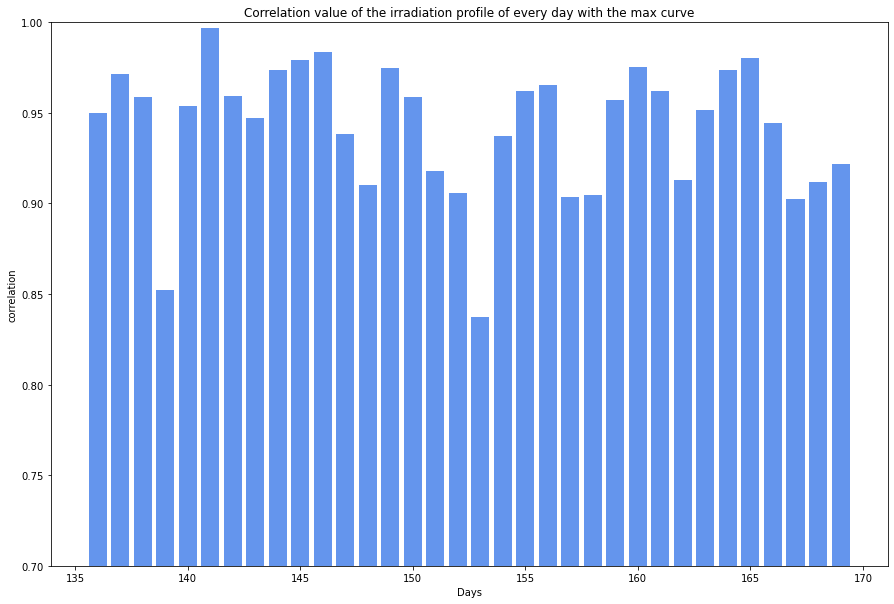

In [96]:
plt.figure(figsize=(15, 10))
plt.bar(irr_corr['DAY'], irr_corr['CORRELATION'], color='cornflowerblue')
plt.ylabel('correlation')
plt.xlabel('Days')
plt.title('Correlation value of the irradiation profile of every day with the max curve')
plt.ylim(0.7, 1)
plt.show()

### AK 
<font color='red'>
Checking single days
</font>

Text(0.5, 1.0, 'Day154')

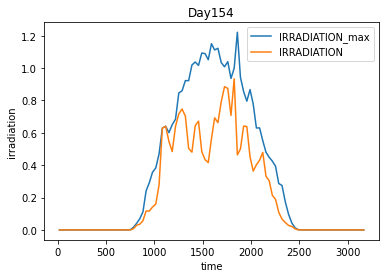

In [111]:
##the least correlated day
index=irr_c==np.min(irr_c)
days=weather_maxirr['DAY'].unique()[index]
for day in days:
    weather_maxirr[weather_maxirr['DAY']==day][['IRRADIATION_max', 'IRRADIATION']].plot()
    plt.xlabel('time')
    plt.ylabel('irradiation')
    plt.title('Day'+str(day))

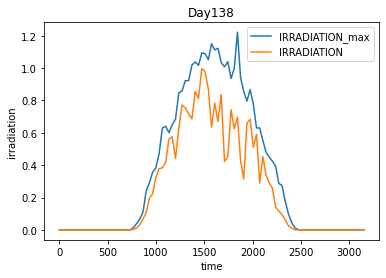

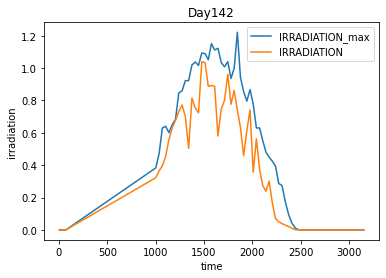

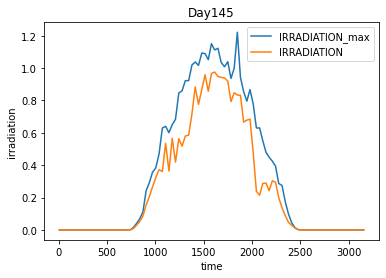

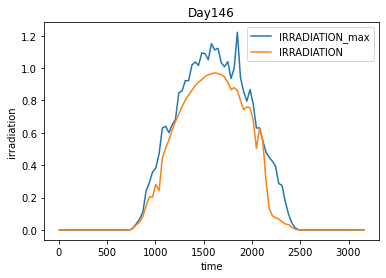

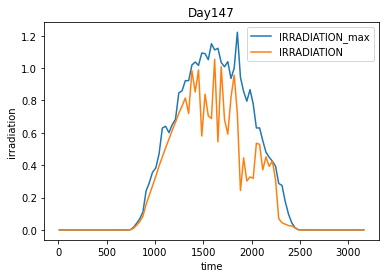

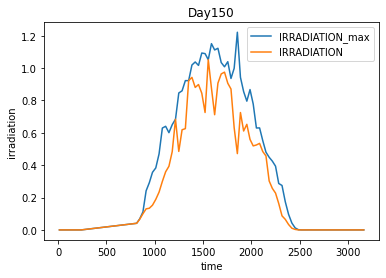

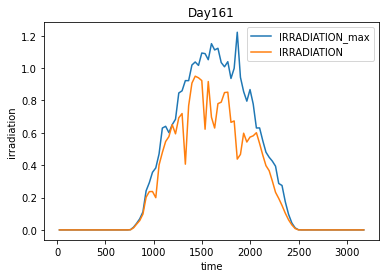

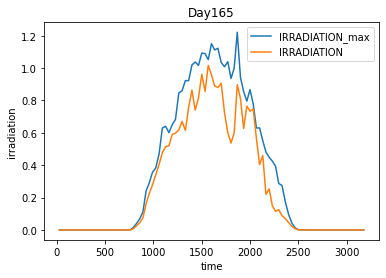

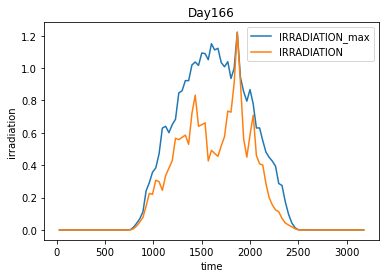

In [126]:
##the most correlated days
index=(np.array(irr_c)>=0.97)
days=weather_maxirr['DAY'].unique()[index]
for day in days:
    weather_maxirr[weather_maxirr['DAY']==day][['IRRADIATION_max', 'IRRADIATION']].plot()
    plt.xlabel('time')
    plt.ylabel('irradiation')
    plt.title('Day'+str(day))

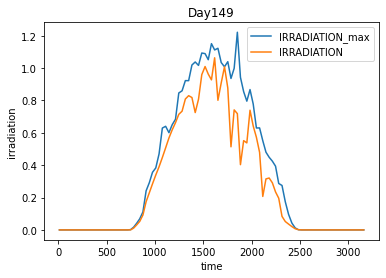

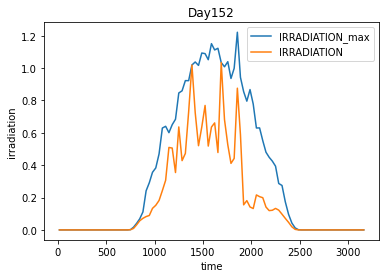

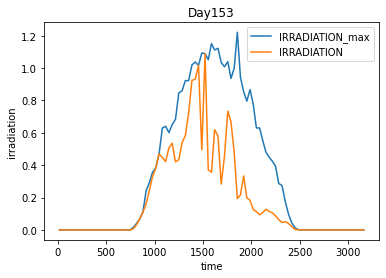

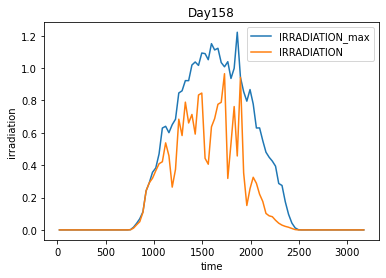

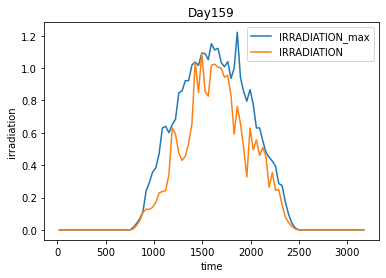

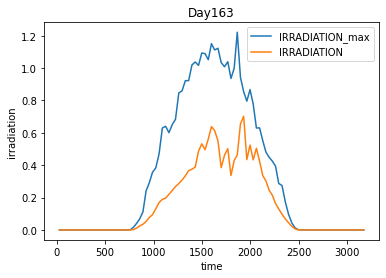

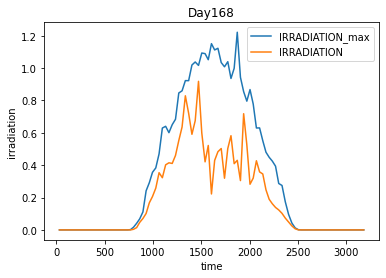

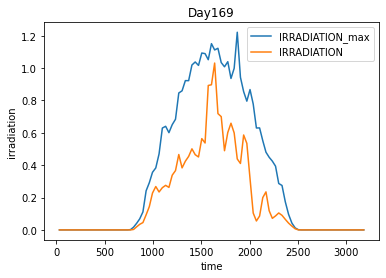

In [123]:
##the days near 0.9
index=(np.array(irr_c)>0.9)&(np.array(irr_c)<0.92)
days=weather_maxirr['DAY'].unique()[index]
for day in days:
    weather_maxirr[weather_maxirr['DAY']==day][['IRRADIATION_max', 'IRRADIATION']].plot()
    plt.xlabel('time')
    plt.ylabel('irradiation')
    plt.title('Day '+str(day))

### AK 
<font color='red'>
the last series of plots for example shows that the correlation does not correspond very much to our visual understanding of the cloudiness. You can see that the same value of 0.9 correspond very different ranges of curves.<br/>
Take for example days 149 and 159. they are behaving very closely to the max curve. Instead the other days do not. However all of them are considered equally cloudy if we were to use the correlation as a cloudiness measure.<br/>
The truth is that correlation does not measure distance of one curve from another, but how similarly the two curves behave. In this context it becomes hard to guess what will correlation pay attention to most, but you can definitely come across a curve that has half the amplitude of the max curve, but results to have high correlation.<br/>
So the definition of correlation does not really correspond to what we want to measure (that is distance of the irradiation curve from max curve). We should eventually find that C_day reflects this distance much better and we will ceck this in the next meeting <br/>
</font>

#### Clean the outliers

### AK 
<font color='red'>
Just a way to do the cleaning in a fewer lines<br/>
</font>

In [233]:
clean_data=weather_data.copy()
for i, j in  clean_data.groupby(clean_data.TIME):
    outlier_condition1=(j['IRRADIATION']!=0)&(j['IRRADIATION']>=(j['IRRADIATION'].mean()+ 3*j['IRRADIATION'].std()))
    outlier_condition2=(j['IRRADIATION']!=0)&(j['IRRADIATION']<(j['IRRADIATION'].mean()- 3*j['IRRADIATION'].std()))
    clean_data.loc[(clean_data['DAY'].isin(j.loc[outlier_condition1|outlier_condition2].DAY))&(clean_data['TIME']==i), 'IRRADIATION']=np.nan

### AK 
<font color='red'>
I noticed that 3 sigma was maybe too high as a limit, so I wanted to do a few trials<br/>
Below are a number of trials with different ways to try and clean the outliers<br/>
We can talk about this in the meeting. None of the curves is perfect, we could settle for 2sigma. <br/>
We could look for nearest neighbour methods<br/>
</font>

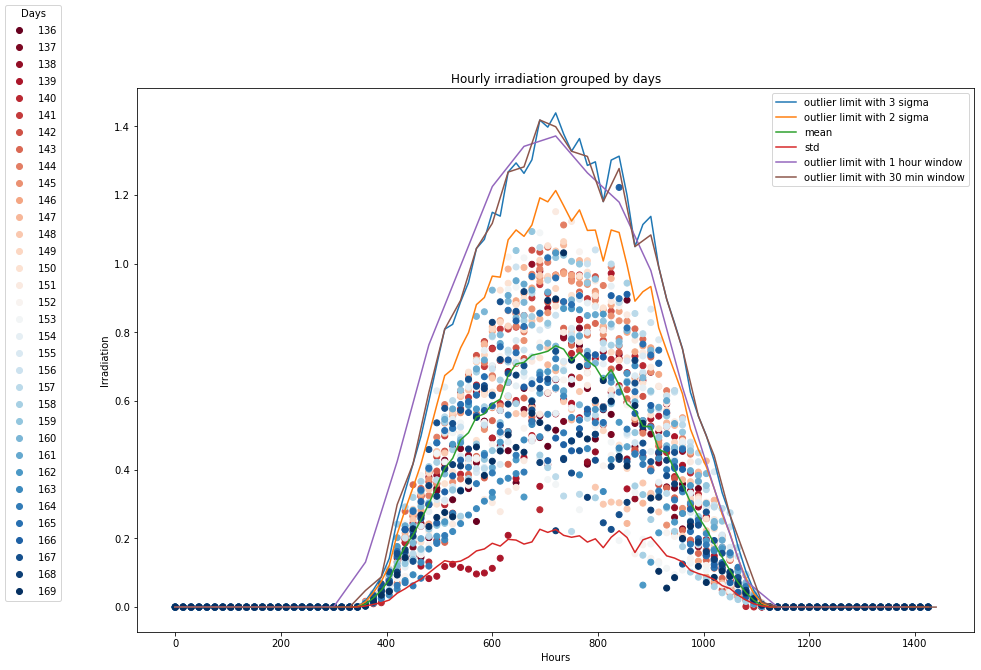

In [260]:
ax=plt.figure(figsize=(15, 10))
n=plt.scatter(weather_data['TIME'], weather_data['IRRADIATION'], c=weather_data['DAY'], cmap='RdBu')
weather_data['half_hour']=round(weather_data['TIME']/30)
agg1=weather_data.groupby(weather_data.TIME).agg({'IRRADIATION': ['mean', 'std']})
agg1['higher_limit']=agg1['IRRADIATION']['mean']+3*agg1['IRRADIATION']['std']
plt.plot(agg1.index, agg1['higher_limit'], label='outlier limit with 3 sigma')
agg1['higher_limit_2sigma']=agg1['IRRADIATION']['mean']+2*agg1['IRRADIATION']['std']
plt.plot(agg1.index, agg1['higher_limit_2sigma'], label='outlier limit with 2 sigma')
plt.plot(agg1.index, agg1['IRRADIATION']['mean'], label='mean')
plt.plot(agg1.index, agg1['IRRADIATION']['std'], label='std')
agg2=weather_data.groupby(weather_data.HOUR).agg({'IRRADIATION': ['mean', 'std']})
agg2['higher_limit']=agg2['IRRADIATION']['mean']+3*agg2['IRRADIATION']['std']
plt.plot(agg2.index*60, agg2['higher_limit'], label='outlier limit with 1 hour window')
agg3=weather_data.groupby(weather_data.half_hour).agg({'IRRADIATION': ['mean', 'std']})
agg3['higher_limit']=agg3['IRRADIATION']['mean']+3*agg3['IRRADIATION']['std']
plt.plot(agg3.index*30, agg3['higher_limit'], label='outlier limit with 30 min window')
plt.ylabel('Irradiation')
plt.xlabel('Hours')
plt.title('Hourly irradiation grouped by days')
ax.legend(*n.legend_elements(num=20), loc="upper left", title="Days")
plt.legend()

In [261]:
clean_data=weather_data.copy()
for i, j in  clean_data.groupby(clean_data.TIME):
    outlier_condition1=(j['IRRADIATION']!=0)&(j['IRRADIATION']>=(j['IRRADIATION'].mean()+ 2*j['IRRADIATION'].std()))
    clean_data.loc[(clean_data['DAY'].isin(j.loc[outlier_condition1|outlier_condition2].DAY))&(clean_data['TIME']==i), 'IRRADIATION']=np.nan

In [262]:
#Hourly maximum irradiation, module and ambient temp
agg_h_irr_clean = clean_data.groupby(clean_data['TIME']).agg({'IRRADIATION': 'max',
                                                            'MODULE_TEMPERATURE': 'max',
                                                            'AMBIENT_TEMPERATURE': 'max'})

#agg_h_irr['TIME']=agg_h_irr.index
agg_h_irr_clean.head()

,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE
TIME,,,
0,0.0,22.857507,25.184316
15,0.0,22.761668,25.084589
30,0.0,22.666227,24.935753
45,0.0,22.743333,24.846130
60,0.0,22.723669,24.621525


<AxesSubplot:xlabel='TIME'>

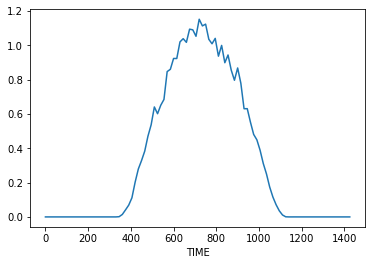

In [263]:
agg_h_irr_clean['IRRADIATION'].plot()

### AK 
<font color='red'>
Below in order not to loose your data points you could join again with weather data and not clean data<br/>
And as expected some outlier points now result to be outside of max, it's ok
</font>

In [264]:
weather_maxirr_clean = pd.merge(weather_data, agg_h_irr_clean, how='inner', on='TIME', suffixes=('', '_max'))
weather_maxirr_clean.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,TIME,HOUR,half_hour,IRRADIATION_max,MODULE_TEMPERATURE_max,AMBIENT_TEMPERATURE_max
0,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,0,0,0.0,0.0,22.857507,25.184316
1,2020-05-17,4135001,HmiyD2TTLFNqkNe,24.170166,21.631490,0.0,138,0,0,0.0,0.0,22.857507,25.184316
2,2020-05-18,4135001,HmiyD2TTLFNqkNe,21.155691,20.599400,0.0,139,0,0,0.0,0.0,22.857507,25.184316
3,2020-05-19,4135001,HmiyD2TTLFNqkNe,22.610982,20.609906,0.0,140,0,0,0.0,0.0,22.857507,25.184316
4,2020-05-20,4135001,HmiyD2TTLFNqkNe,22.465285,20.111123,0.0,141,0,0,0.0,0.0,22.857507,25.184316


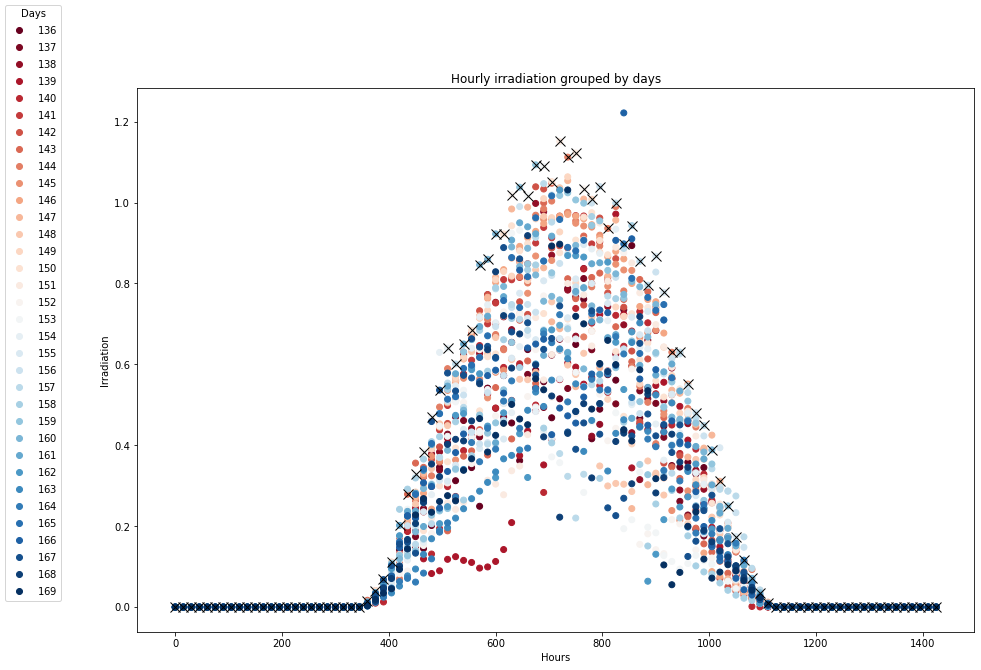

In [265]:
ax=plt.figure(figsize=(15, 10))
n=plt.scatter(weather_data['TIME'], weather_data['IRRADIATION'], c=weather_data['DAY'], cmap='RdBu')
plt.plot(agg_h_irr_clean.index, agg_h_irr_clean['IRRADIATION'], 'kx', markersize=10 )
plt.ylabel('Irradiation')
plt.xlabel('Hours')
plt.title('Hourly irradiation grouped by days')
ax.legend(*n.legend_elements(num=20), loc="upper left", title="Days")

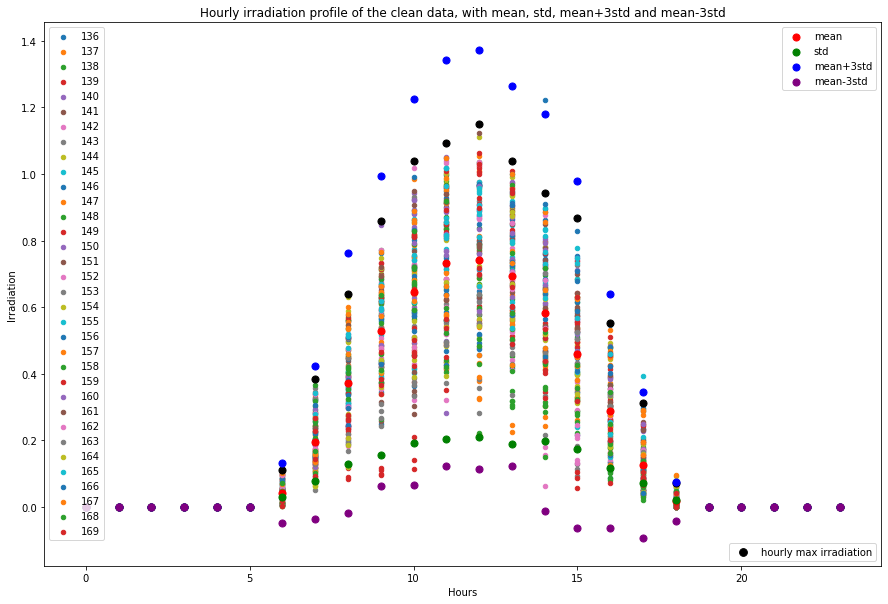

In [21]:
ax =plt.figure(figsize=(15, 10))
for a, b in weather_data.groupby(weather_data['DAY']):
    plt.scatter(b['HOUR'], b['IRRADIATION'], s=20)
plt.scatter(agg_h_irr_clean.index, agg_h_irr_clean['IRRADIATION'], color='black', s=50)
for i, j in  weather_data.groupby(weather_data.HOUR):
    custom_point=[plt.scatter(i, (j['IRRADIATION'].mean()), color='red', s=50),
                   plt.scatter(i, (j['IRRADIATION'].std()), color='green', s=50),
                   plt.scatter(i, (j['IRRADIATION'].mean()+ 3*j['IRRADIATION'].std()), color='blue', s=50),
                   plt.scatter(i, (j['IRRADIATION'].mean()- 3*j['IRRADIATION'].std()), color='purple', s=50)]
legend1 = plt.legend(agg_df['DAY'], loc='upper left')
legend2 = plt.legend(custom_point, ['mean', 'std', 'mean+3std', 'mean-3std'], loc='upper right')
legend3 = plt.legend(m,['hourly max irradiation'], loc='lower right')
ax.add_artist(legend1)
ax.add_artist(legend2)
plt.ylabel('Irradiation')
plt.xlabel('Hours')
plt.title('Hourly irradiation profile of the clean data, with mean, std, mean+3std and mean-3std')
plt.show()

In [266]:
weather_maxirr_clean['irradiation_offset_from_max']=((weather_maxirr_clean['IRRADIATION_max']-weather_maxirr_clean['IRRADIATION'])*((weather_maxirr_clean['IRRADIATION_max']-weather_maxirr_clean['IRRADIATION'])>0) )**2
C_day_list_cleaned=weather_maxirr_clean.groupby('DAY').sum()['irradiation_offset_from_max']

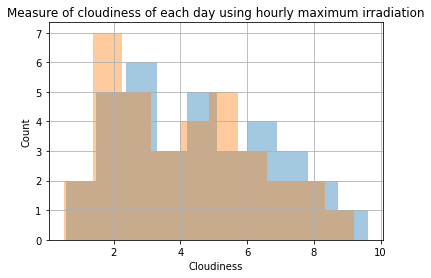

In [267]:
C_day_list.hist(alpha=0.4)
C_day_list_cleaned.hist(alpha=0.4)
plt.ylabel('Count')
plt.xlabel('Cloudiness')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation')
plt.show() 

### AK 
<font color='red'>
The distribution does not change much after removing the outliers. To be honest for the type of use the C_day will have we don-t need to be very precise and even the max profile with the outlier was ok or the 2sigma removal of outliers.
</font>

The maximum curve here is smoother when the outliers are removed

#### C_day using clean data

In [241]:
C_day_clean=[]
plt.figure(figsize=(15, 10))
for a, b in weather_maxirr_clean.groupby(weather_maxirr_clean['DAY']):
    ind = b[b['DAY']==a].index.values
    C = (b.IRRADIATION_y-b.loc[ind, 'IRRADIATION_x'])**2
    C_day = C.sum()
    C_day_clean.append(C_day)
plt.hist(C_day_clean, color='cornflowerblue')
plt.ylabel('Count')
plt.xlabel('Cloudiness')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation of clean data')
plt.show() 

AttributeError: 'DataFrame' object has no attribute 'IRRADIATION_y'

<Figure size 1080x720 with 0 Axes>

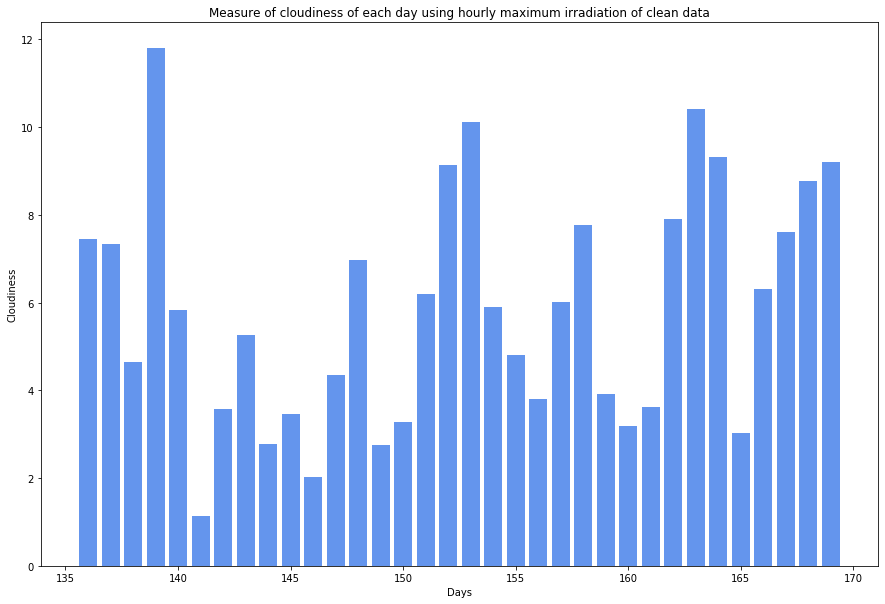

In [23]:
plt.figure(figsize=(15, 10))
for a, b in weather_maxirr_clean.groupby(weather_maxirr_clean['DAY']):
    ind = b[b['DAY']==a].index.values
    C = (b.IRRADIATION_y-b.loc[ind, 'IRRADIATION_x'])**2
    C_day = C.sum()
    plt.bar(b.DAY,C_day ,align='center', color='cornflowerblue')
plt.ylabel('Cloudiness')
plt.xlabel('Days')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation of clean data')
plt.show()

## Overplot module temperature profiles for many days 

NameError: name 'agg_df' is not defined

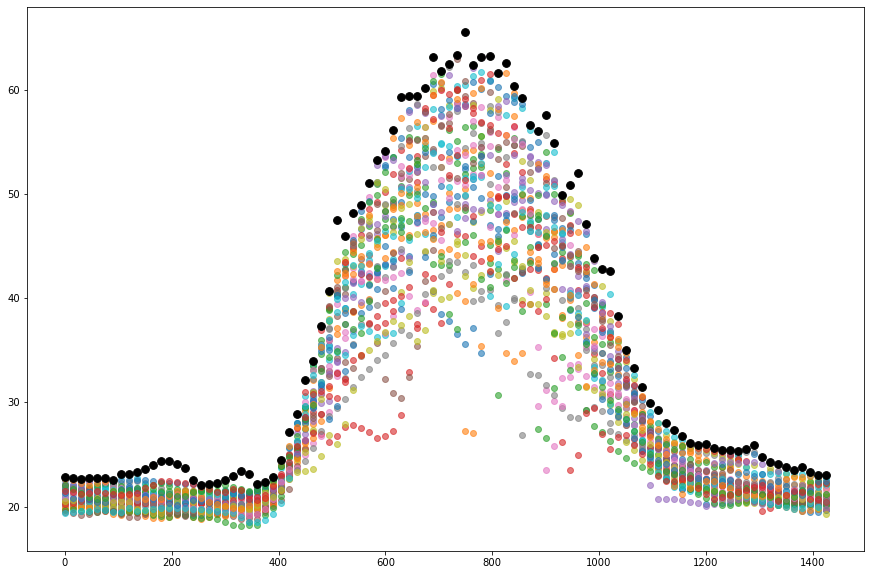

In [269]:
plt.figure(figsize=(15, 10))
for a, b in weather_data.groupby(weather_data['DAY']):
    plt.scatter(b['TIME'], b['MODULE_TEMPERATURE'], alpha = 0.6)
plt.scatter(agg_h_irr.index, agg_h_irr['MODULE_TEMPERATURE'], color='black', s=60)
plt.legend(agg_df['DAY'])
plt.ylabel('MODULE_TEMPERATURE')
plt.xlabel('Hours')
plt.title('Hourly module temperature profile of each day')
plt.show()

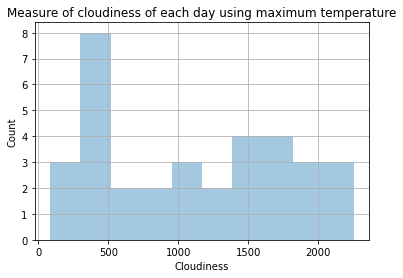

In [274]:
weather_maxirr['temperature_offset_from_max']=(weather_maxirr['AMBIENT_TEMPERATURE_max']-weather_maxirr['AMBIENT_TEMPERATURE'])**2.
C_day_temp_list=weather_maxirr.groupby('DAY').sum()['temperature_offset_from_max']
C_day_temp_list.hist(alpha=0.4)
plt.ylabel('Count')
plt.xlabel('Cloudiness')
plt.title('Measure of cloudiness of each day using maximum temperature')
plt.show() 

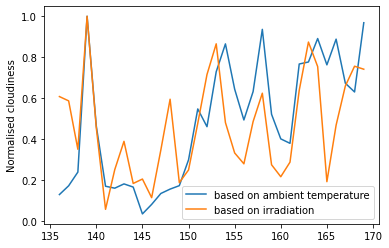

In [284]:
plt.plot(C_day_temp_list/np.max(C_day_temp_list), label="based on ambient temperature")
plt.plot(C_day_list/np.max(C_day_list), label="based on irradiation")
plt.ylabel("Normalised cloudiness")
plt.legend()

### AK 
<font color='red'>
In the plots below I just check to see which one of these coiefficients gives us a correct idea of the area. Some look ok, but we might need to calculate the area bleow the curve, it might be the best way.
</font>

Text(0.5, 1.0, 'Day137')

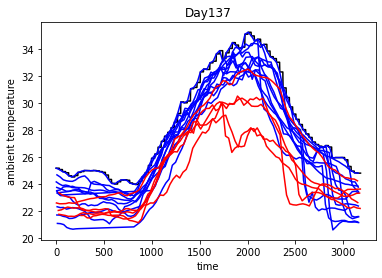

In [292]:
index=(np.array(C_day_temp_list)<=500)
days=weather_maxirr['DAY'].unique()[index]
plt.figure()
plt.plot(weather_maxirr[['AMBIENT_TEMPERATURE_max']], "k")
for day in days:
    plt.plot(weather_maxirr[weather_maxirr['DAY']==day][['AMBIENT_TEMPERATURE']], "b")
index=(np.array(C_day_temp_list)>=2000)
days=weather_maxirr['DAY'].unique()[index]
for day in days:
    plt.plot(weather_maxirr[weather_maxirr['DAY']==day][['AMBIENT_TEMPERATURE']], "r")
plt.xlabel('time')
plt.ylabel('ambient temperature')

Text(0.5, 1.0, 'Day164')

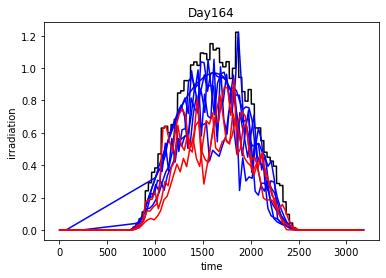

In [293]:
index=(np.array(C_day_list)<=2)
days=weather_maxirr['DAY'].unique()[index]
plt.figure()
plt.plot(weather_maxirr[['IRRADIATION_max']], "k")
for day in days:
    plt.plot(weather_maxirr[weather_maxirr['DAY']==day][['IRRADIATION']], "b")
index=(np.array(C_day_list)>=8)
days=weather_maxirr['DAY'].unique()[index]
for day in days:
    plt.plot(weather_maxirr[weather_maxirr['DAY']==day][['IRRADIATION']], "r")
plt.xlabel('time')
plt.ylabel('irradiation')

Text(0, 0.5, 'irradiation')

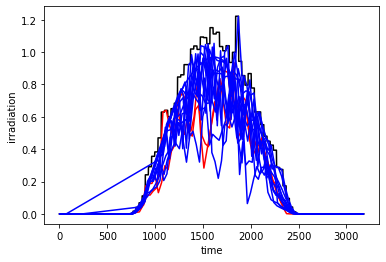

In [308]:
index=(np.array(irr_c)<=0.9)
days=weather_maxirr['DAY'].unique()[index]
plt.figure()
plt.plot(weather_maxirr[['IRRADIATION_max']], "k")
for day in days:
    plt.plot(weather_maxirr[weather_maxirr['DAY']==day][['IRRADIATION']], "r")
index=(np.array(irr_c)>=0.96)
days=weather_maxirr['DAY'].unique()[index]
for day in days:
    plt.plot(weather_maxirr[weather_maxirr['DAY']==day][['IRRADIATION']], "b")
plt.xlabel('time')
plt.ylabel('irradiation')

In [304]:
C_day_area_max=weather_maxirr_clean[weather_maxirr_clean['DAY']==153]['IRRADIATION_max'].sum()
C_day_area=weather_maxirr.groupby('DAY').sum()['IRRADIATION']/C_day_area_max

<AxesSubplot:>

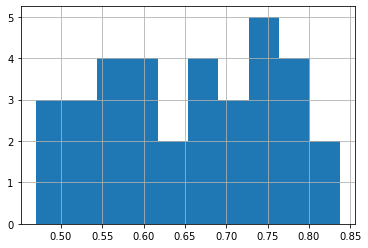

In [305]:
C_day_area.hist()

Text(0, 0.5, 'irradiation')

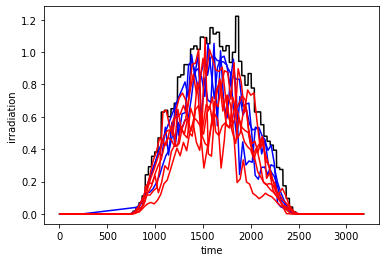

In [309]:
index=(np.array(C_day_area)>=0.8)
days=weather_maxirr['DAY'].unique()[index]
plt.figure()
plt.plot(weather_maxirr[['IRRADIATION_max']], "k")
for day in days:
    plt.plot(weather_maxirr[weather_maxirr['DAY']==day][['IRRADIATION']], "b")
index=(np.array(C_day_area)<=0.55)
days=weather_maxirr['DAY'].unique()[index]
for day in days:
    plt.plot(weather_maxirr[weather_maxirr['DAY']==day][['IRRADIATION']], "r")
plt.xlabel('time')
plt.ylabel('irradiation')

#### Calculating C_day also for module temperature might be interesting as we can compare and convince ourselves that the days where module temperature is very much off the max behaviour coincide with those where irradiation is off the max behaviour.

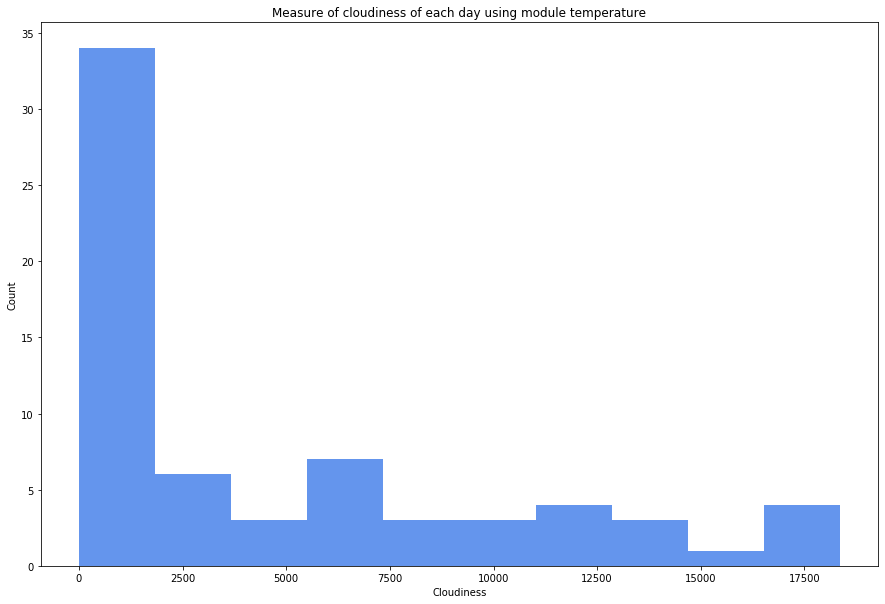

In [25]:
C_day_mod=[]
plt.figure(figsize=(15, 10))
for a, b in weather_maxirr.groupby(weather_maxirr['DAY']):
    ind = b[b['DAY']==a].index.values
    C = (b.MODULE_TEMPERATURE_y-b.loc[ind, 'MODULE_TEMPERATURE_x'])**2
    C_day = C.sum()
    C_day_clean.append(C_day)
plt.hist(C_day_clean, color='cornflowerblue')
plt.ylabel('Count')
plt.xlabel('Cloudiness')
plt.title('Measure of cloudiness of each day using module temperature')
plt.show() 

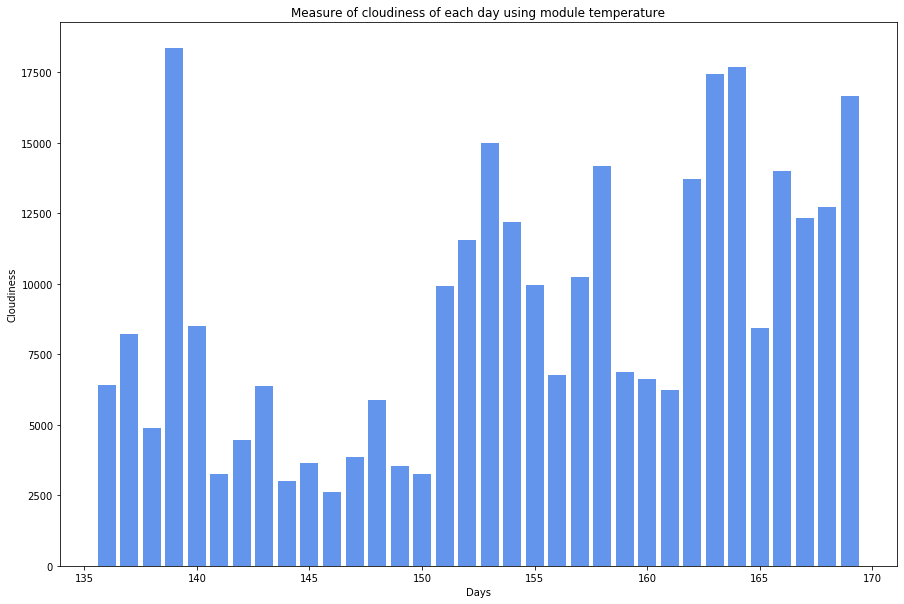

In [26]:
plt.figure(figsize=(15, 10))
for a, b in weather_maxirr.groupby(weather_maxirr['DAY']):
    ind = b[b['DAY']==a].index.values
    C = (b.MODULE_TEMPERATURE_y-b.loc[ind, 'MODULE_TEMPERATURE_x'])**2
    C_day = C.sum()
    plt.bar(b.DAY,C_day ,align='center', color='cornflowerblue')
plt.ylabel('Cloudiness')
plt.xlabel('Days')
plt.title('Measure of cloudiness of each day using module temperature')
plt.show()

## Plot DC power vs AC power

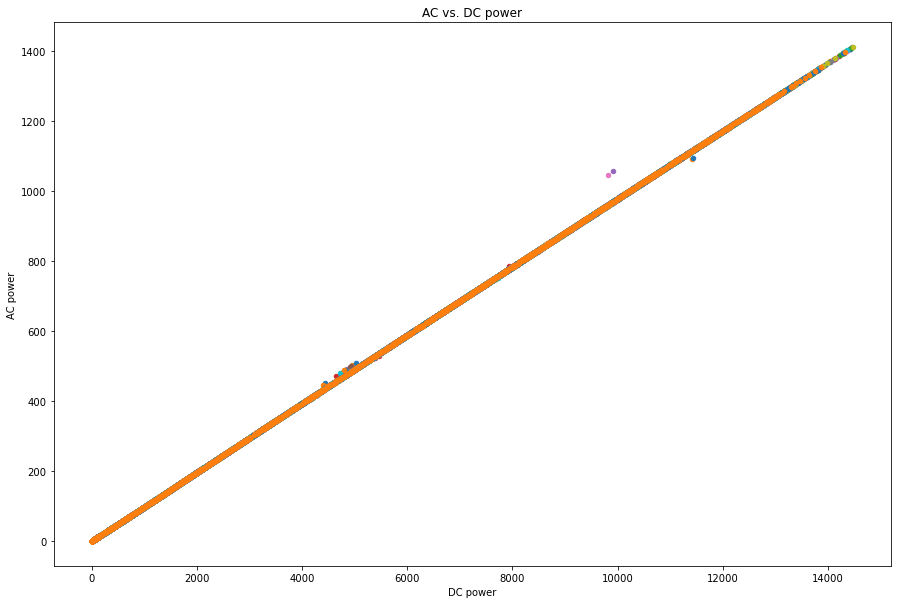

In [33]:
plt.figure(figsize=(15, 10))
for i, source_key in gen_data.groupby(gen_data.SOURCE_KEY):
    m =[plt.scatter(source_key['DC_POWER'], source_key['AC_POWER'], s=20)]
#plt.legend(m, i)
plt.xlabel('DC power')
plt.ylabel('AC power')
plt.title('AC vs. DC power')
plt.show()

In [37]:
gen_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY,TIME,HOUR
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,136,00:00:00,0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,136,00:00:00,0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,136,00:00:00,0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,136,00:00:00,0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,136,00:00:00,0


### AK 
<font color='red'>
below checking the days on which the outliers happened and it seems there was a problem on 14-06 at 08:30<br/>
lower values instead seem to happen often around 18:30, but this is the time that the power starts to go down and so the dispersion becomes higher. so its 
</font>

(array([1.9120e+03, 1.2953e+04, 2.1943e+04, 1.0000e+00, 0.0000e+00,
        1.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.09555185, 0.09665588, 0.09775992, 0.09886395, 0.09996799,
        0.10107202, 0.10217606, 0.10328009, 0.10438413, 0.10548816,
        0.10659219]),
 <BarContainer object of 10 artists>)

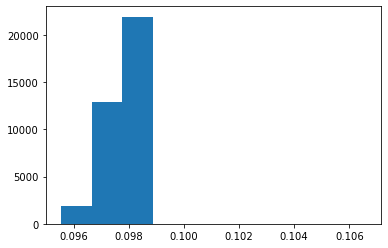

In [311]:
gen_data["power_conversion_coeff"]=gen_data["AC_POWER"]/gen_data["DC_POWER"]
plt.hist(gen_data["power_conversion_coeff"])

In [326]:
print(gen_data["power_conversion_coeff"].mean()+3*gen_data["power_conversion_coeff"].std(), gen_data["power_conversion_coeff"].mean()-3*gen_data["power_conversion_coeff"].std())

0.09909383653147232 0.09634389872452061


In [312]:
gen_data[gen_data["power_conversion_coeff"]>0.099]

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY,TIME,HOUR,power_conversion_coeff
14290,2020-05-22 13:00:00,4135001,McdE0feGgRqW7Ca,9904.571429,1055.750000,4057.000000,7213112.000,143,780,13,0.106592
14302,2020-05-22 13:00:00,4135001,sjndEbLyjtCKgGv,9814.285714,1044.900000,4280.000000,7070166.000,143,780,13,0.106467
61122,2020-06-14 08:30:00,4135001,1BY6WEcLGh8j5v7,4431.000000,451.285714,567.142857,6464230.143,166,510,8,0.101847
61123,2020-06-14 08:30:00,4135001,1IF53ai7Xc0U56Y,4955.750000,501.742857,632.857143,6407513.857,166,510,8,0.101245
61125,2020-06-14 08:30:00,4135001,7JYdWkrLSPkdwr4,4792.500000,484.928571,615.714286,7821467.714,166,510,8,0.101185
61126,2020-06-14 08:30:00,4135001,McdE0feGgRqW7Ca,4856.250000,492.114286,633.571429,7382556.571,166,510,8,0.101336
61127,2020-06-14 08:30:00,4135001,VHMLBKoKgIrUVDU,4917.500000,498.242857,627.857143,7430193.857,166,510,8,0.101320
61130,2020-06-14 08:30:00,4135001,ZnxXDlPa8U1GXgE,4791.625000,486.114286,612.714286,6744955.714,166,510,8,0.101451
61132,2020-06-14 08:30:00,4135001,adLQvlD726eNBSB,5025.750000,509.042857,645.142857,6498141.143,166,510,8,0.101287
61133,2020-06-14 08:30:00,4135001,bvBOhCH3iADSZry,4390.375000,445.828571,560.142857,6518202.143,166,510,8,0.101547


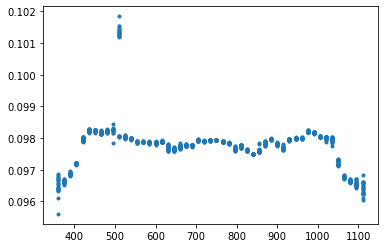

In [322]:
plt.plot(gen_data[gen_data["DAY"]==166]["TIME"], gen_data[gen_data["DAY"]==166]["power_conversion_coeff"], '.')

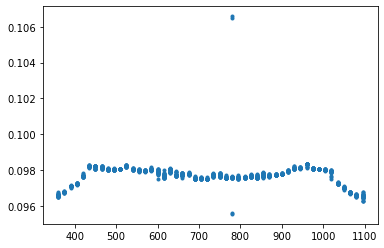

In [327]:
plt.plot(gen_data[gen_data["DAY"]==143]["TIME"], gen_data[gen_data["DAY"]==143]["power_conversion_coeff"], '.')

In [317]:
gen_data[gen_data["power_conversion_coeff"]<0.096]

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY,TIME,HOUR,power_conversion_coeff
7643,2020-05-18 18:30:00,4135001,rGa61gmuvPhdLxV,8.875000,0.850000,5365.000000,7136902.000,139,1110,18,0.095775
9619,2020-05-19 18:00:00,4135001,uHbuxQJl8lW7ozc,9.250000,0.887500,6997.000000,7071198.000,140,1080,18,0.095946
14287,2020-05-22 13:00:00,4135001,1IF53ai7Xc0U56Y,11413.250000,1090.557143,4384.285714,6237631.286,143,780,13,0.095552
14296,2020-05-22 13:00:00,4135001,adLQvlD726eNBSB,11439.500000,1093.771429,4435.000000,6326008.000,143,780,13,0.095614
16666,2020-05-23 18:30:00,4135001,1BY6WEcLGh8j5v7,21.000000,2.014286,7965.857143,6320402.857,144,1110,18,0.095918
20820,2020-05-25 18:30:00,4135001,McdE0feGgRqW7Ca,39.875000,3.825000,8958.000000,7241649.000,146,1110,18,0.095925
20826,2020-05-25 18:30:00,4135001,adLQvlD726eNBSB,42.857143,4.114286,9162.857143,6355293.857,146,1110,18,0.096000
30539,2020-05-30 18:30:00,4135001,uHbuxQJl8lW7ozc,37.125000,3.562500,7339.875000,7159271.875,151,1110,18,0.095960
30541,2020-05-30 18:30:00,4135001,z9Y9gH1T5YWrNuG,28.285714,2.714286,7142.000000,7127597.000,151,1110,18,0.095960
34750,2020-06-01 18:30:00,4135001,adLQvlD726eNBSB,27.500000,2.637500,6126.750000,6406830.750,153,1110,18,0.095909


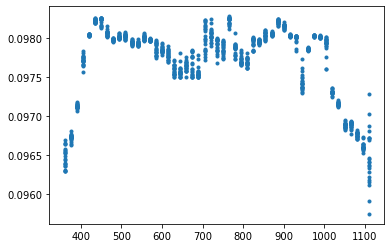

In [325]:
plt.plot(gen_data[gen_data["DAY"]==153]["TIME"], gen_data[gen_data["DAY"]==153]["power_conversion_coeff"], '.')

#### Investigate the outliers

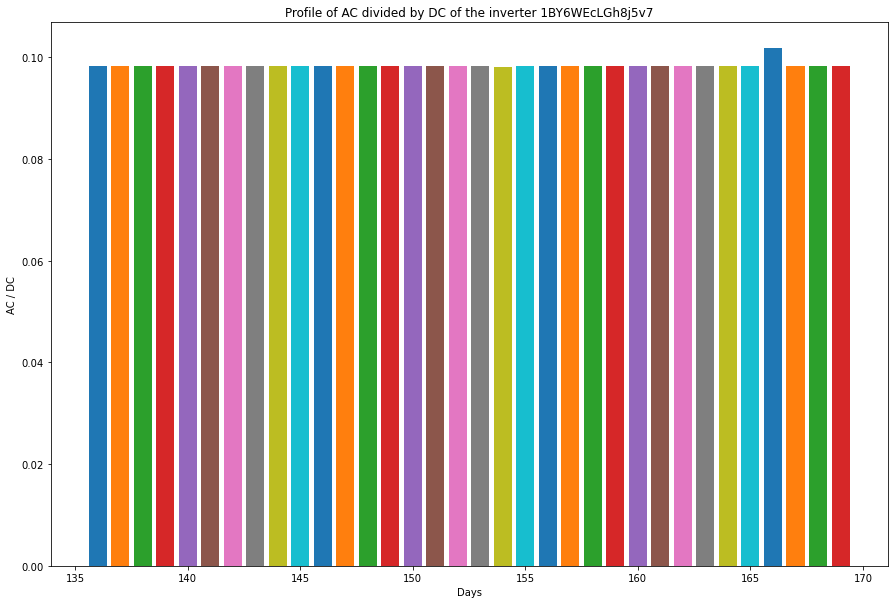

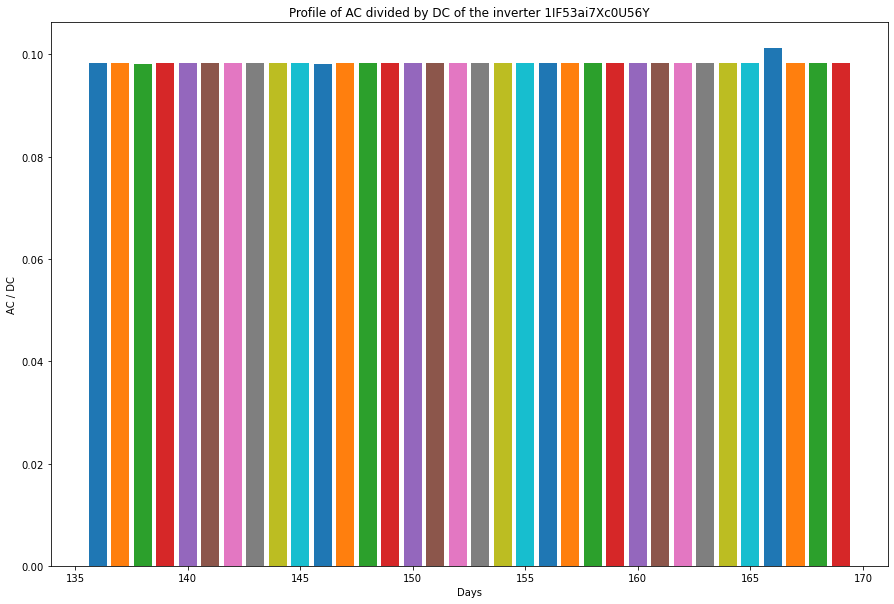

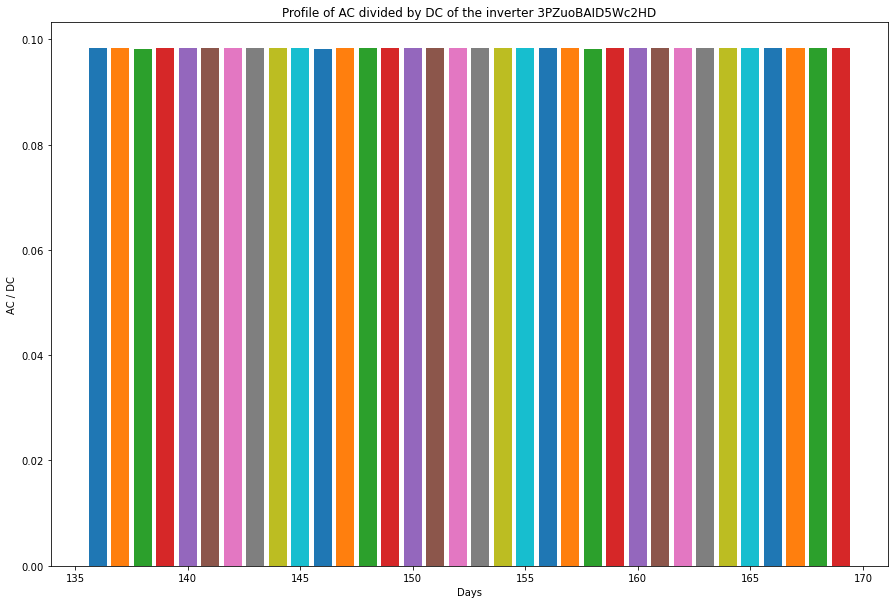

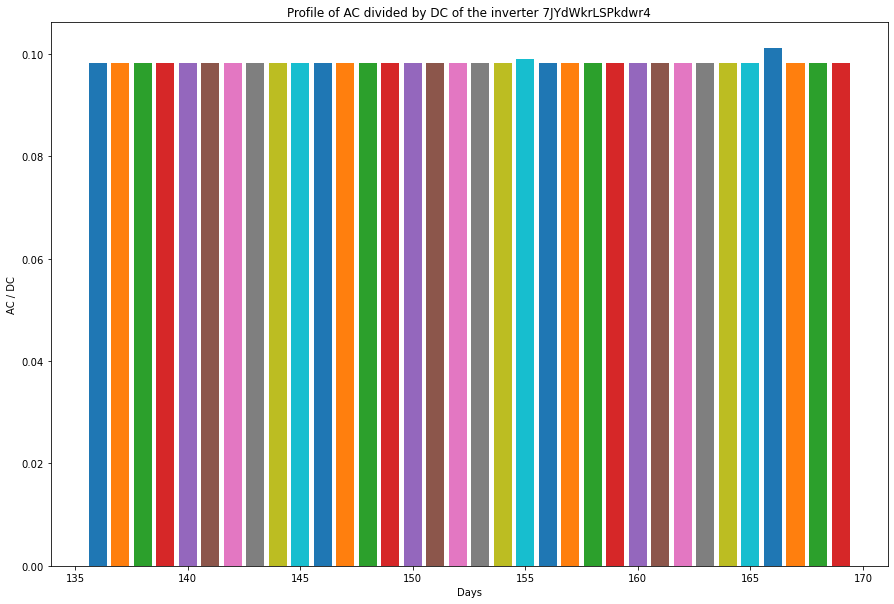

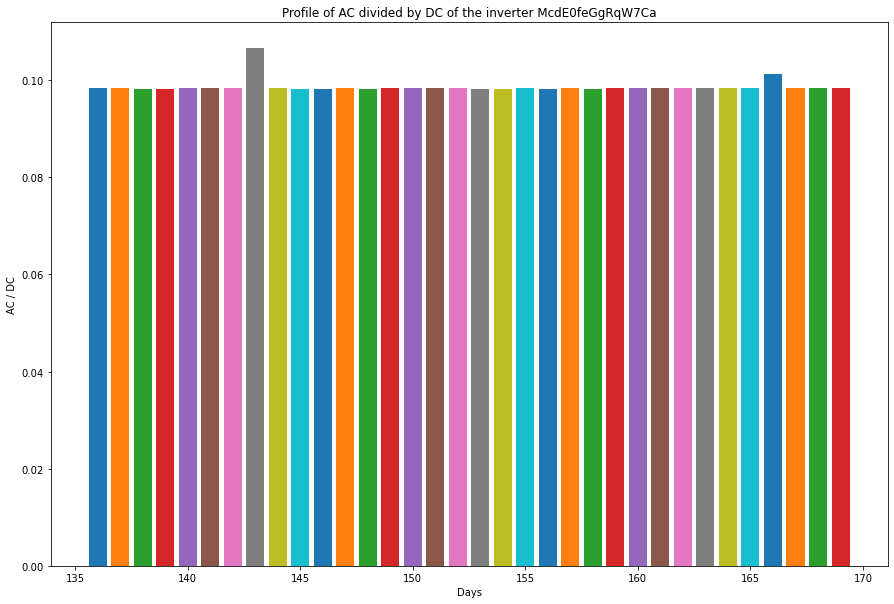

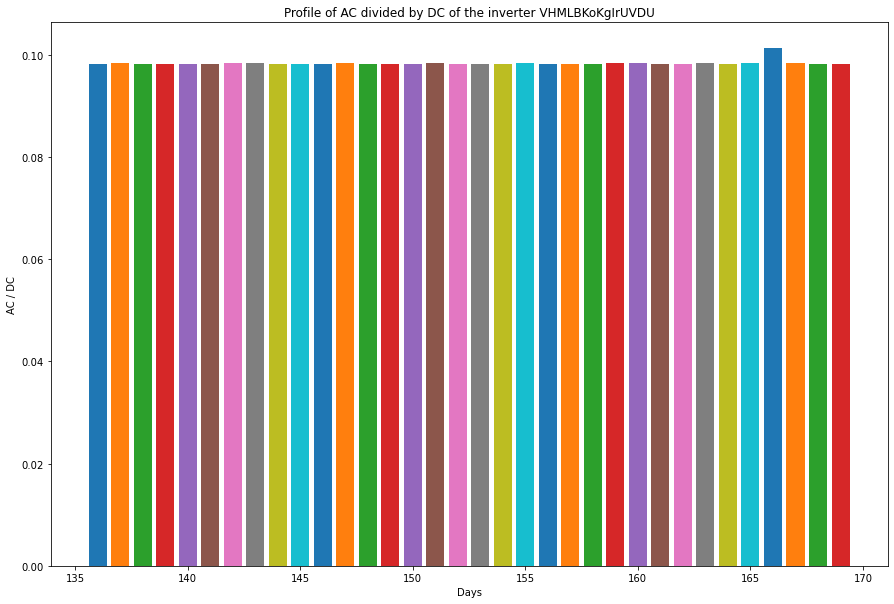

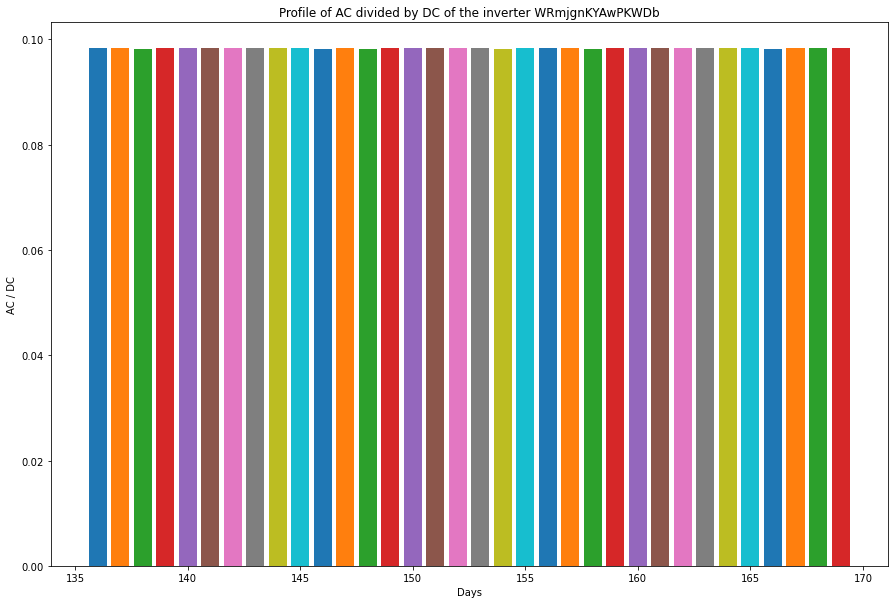

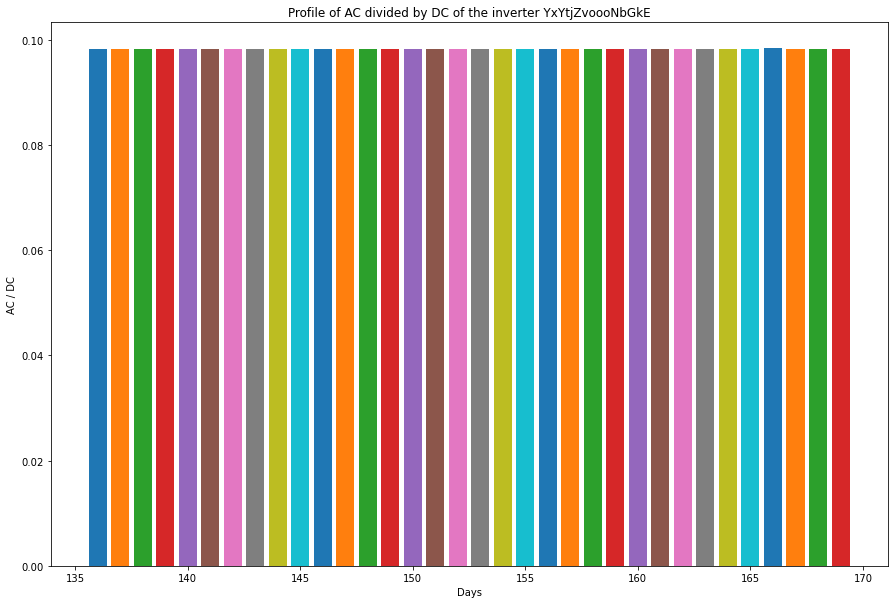

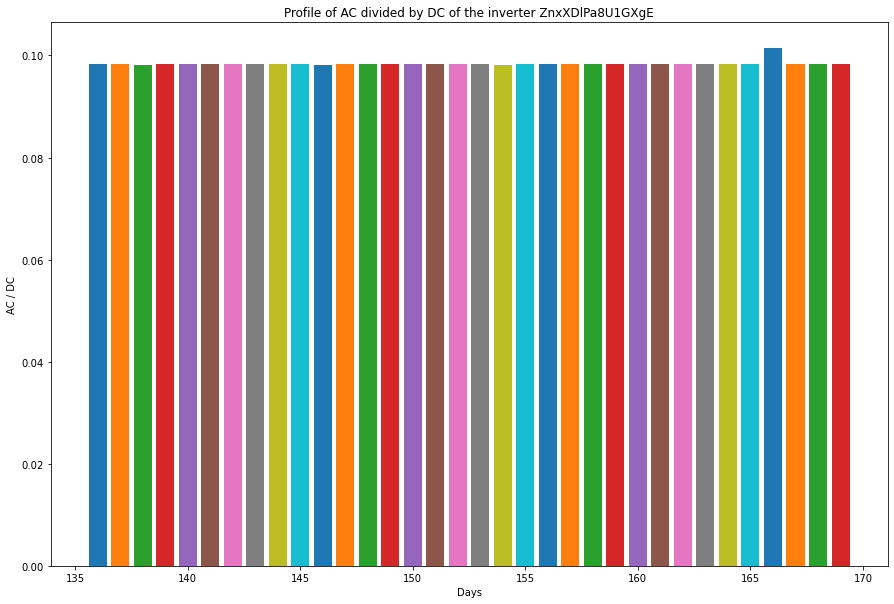

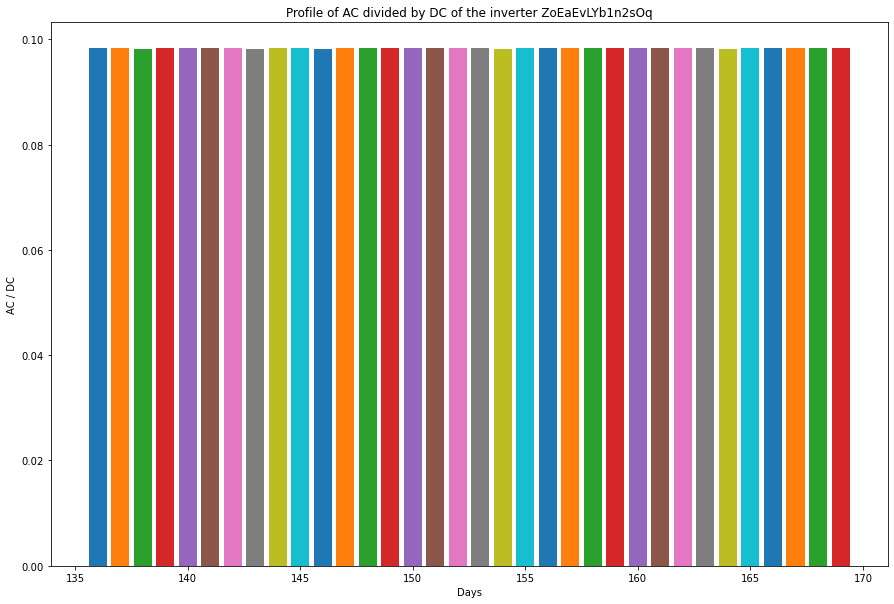

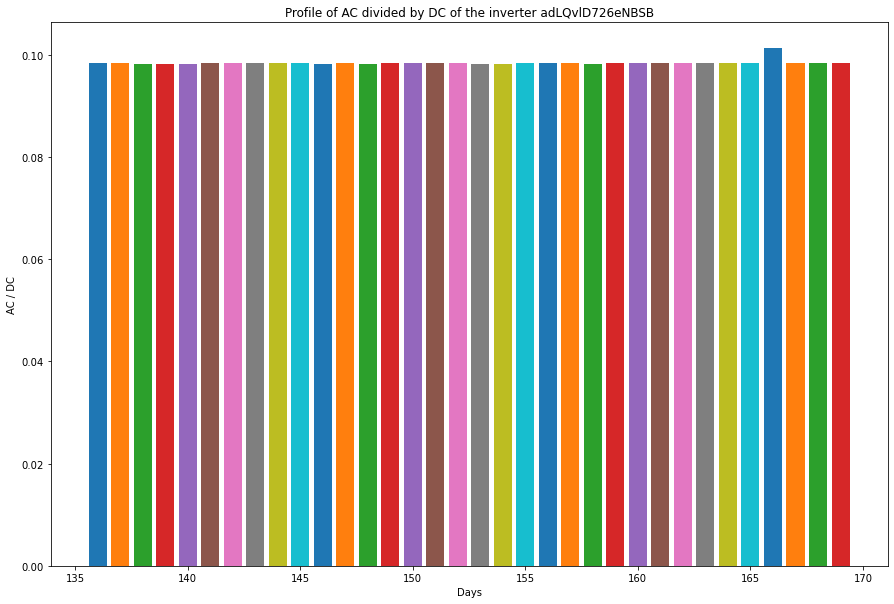

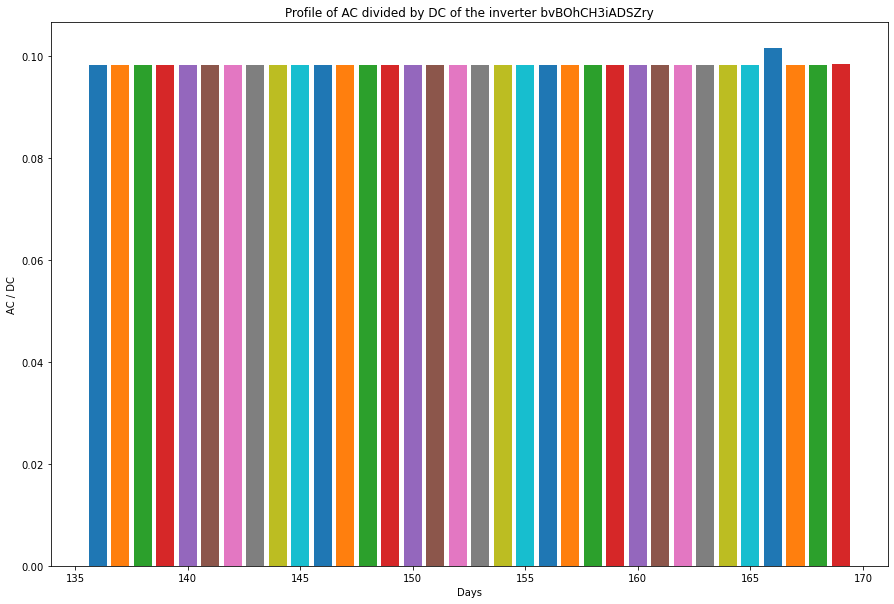

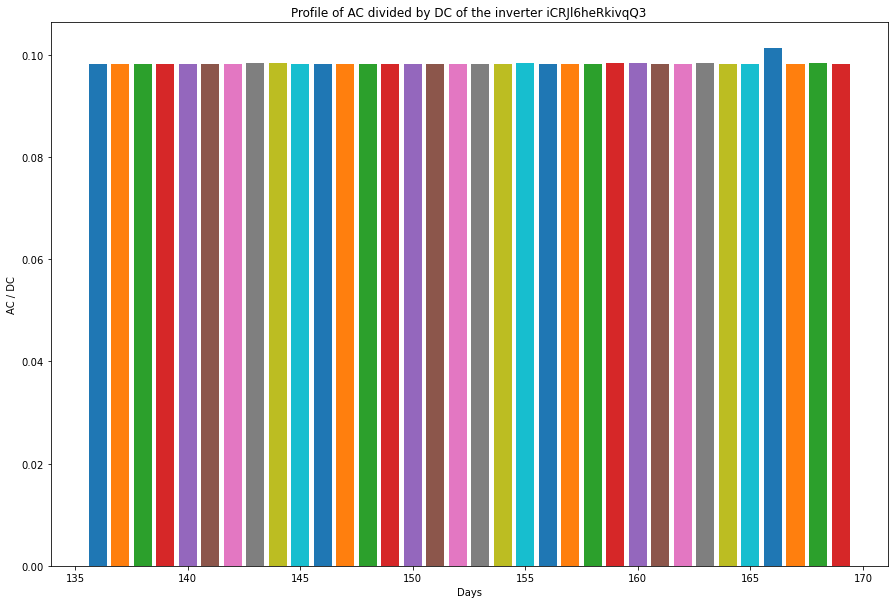

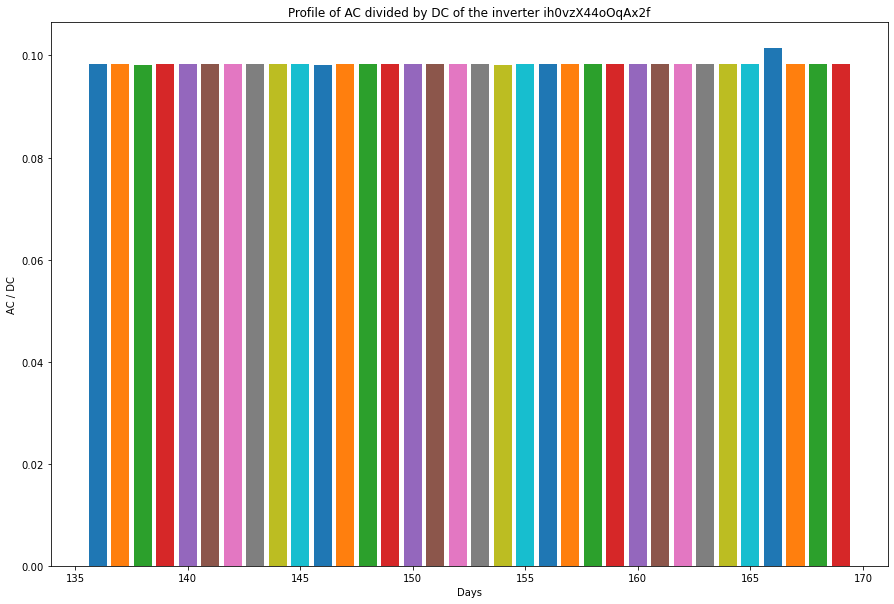

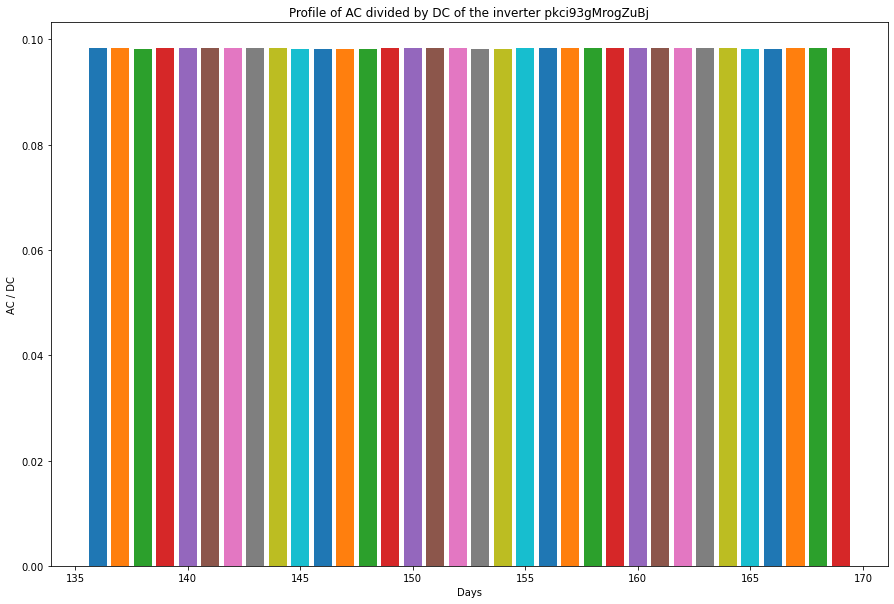

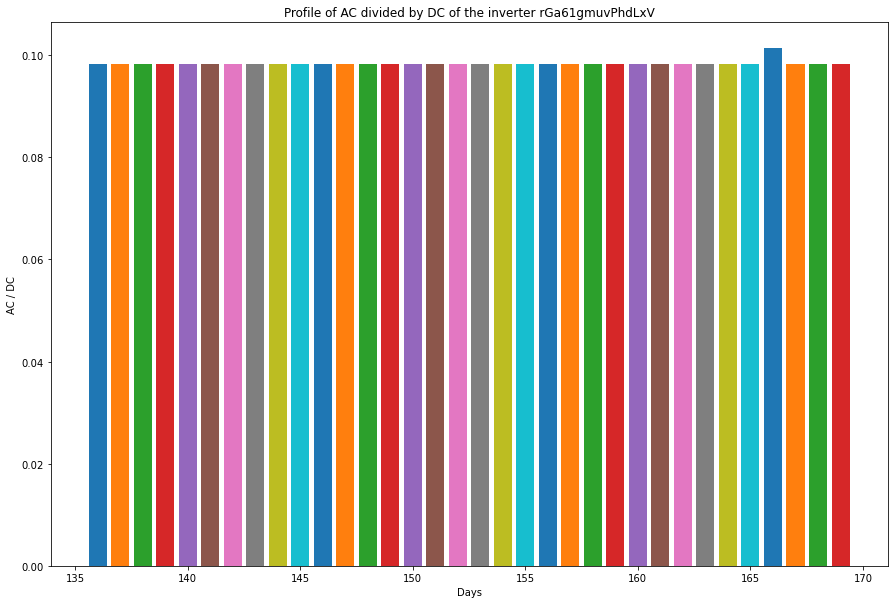

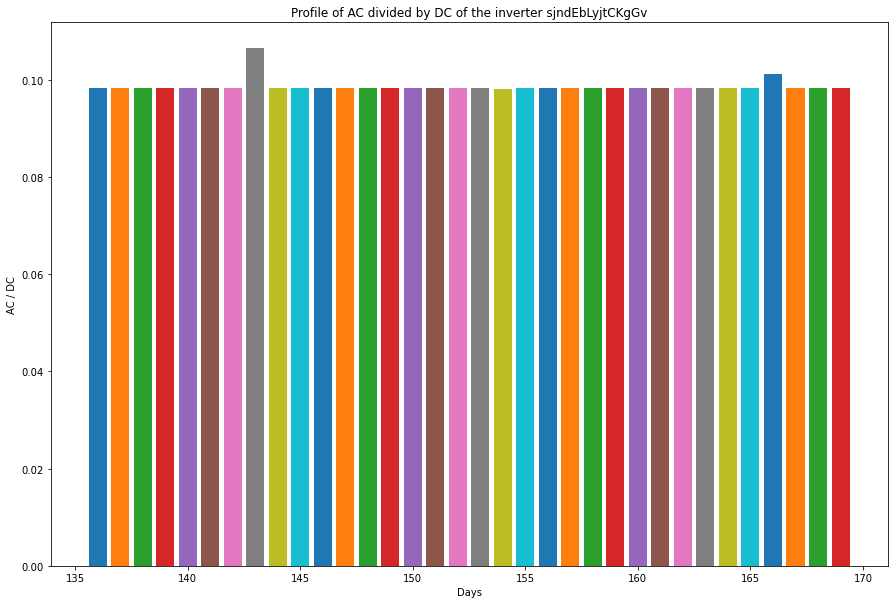

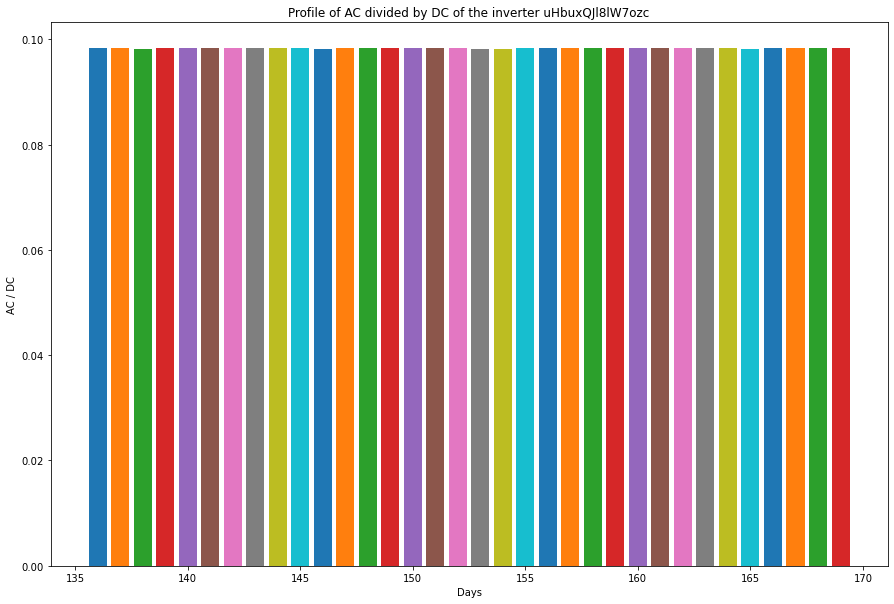

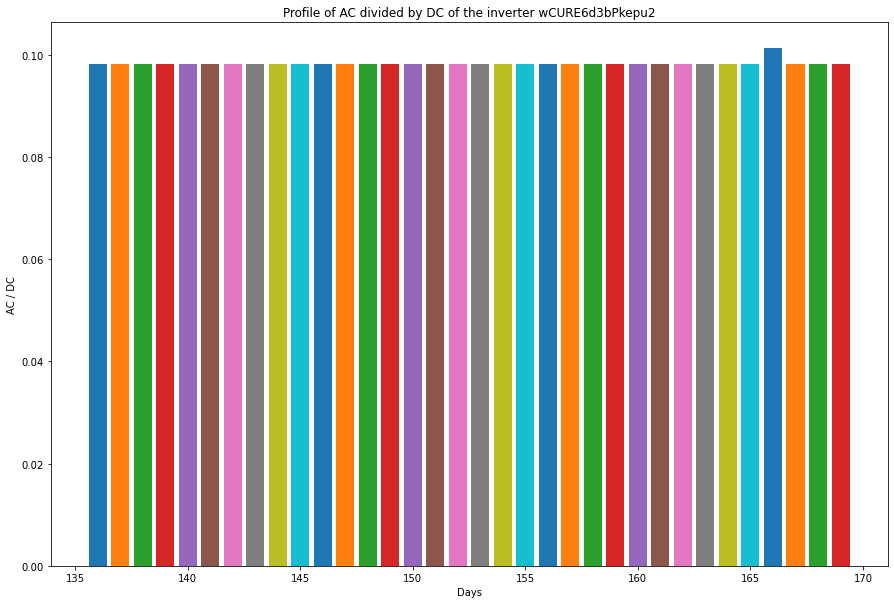

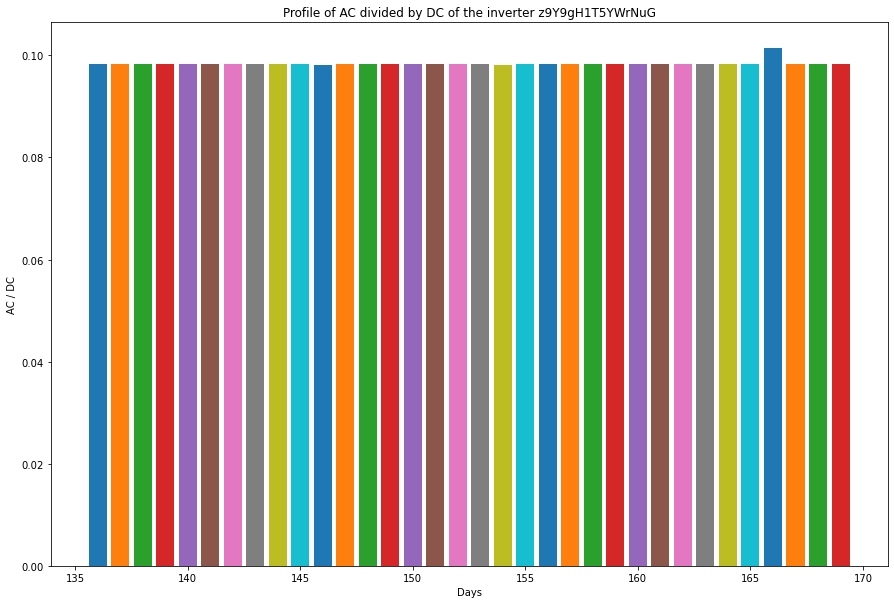

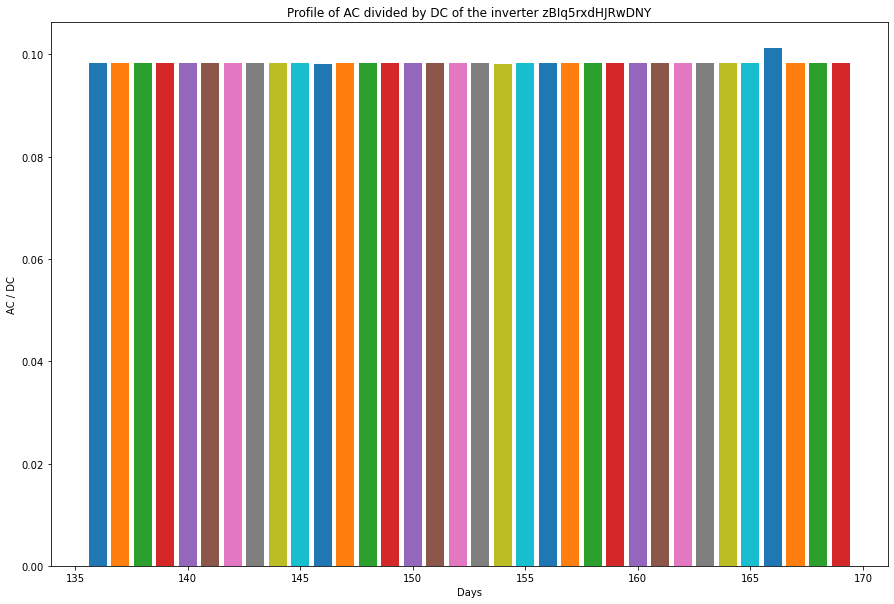

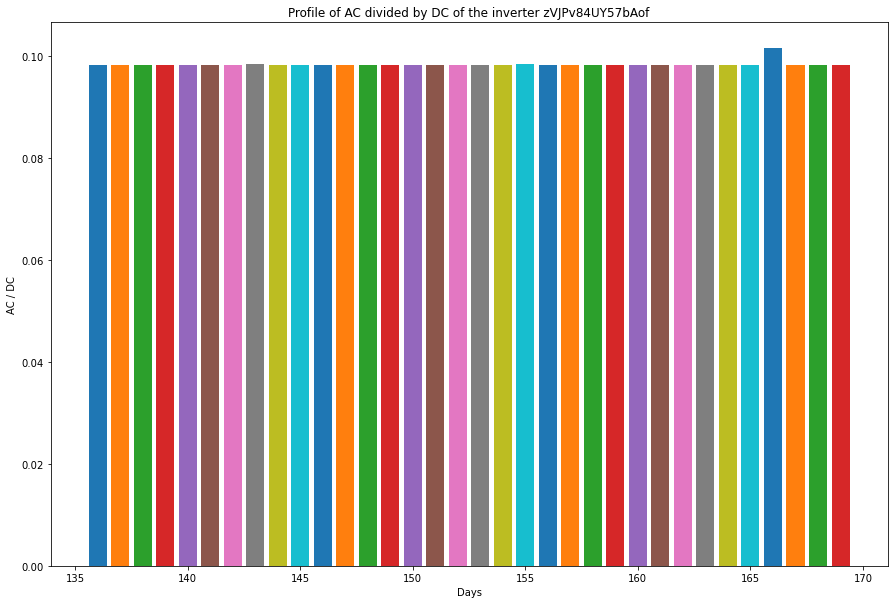

In [34]:
for i, source_key in gen_data.groupby(gen_data.SOURCE_KEY):
    plt.figure(figsize=(15, 10))
    for a, b in source_key.groupby(source_key.DAY):
        ACDC = b.AC_POWER / b.DC_POWER
        plt.bar(b.DAY, ACDC)
    plt.xlabel('Days')
    plt.ylabel('AC / DC')
    plt.title('Profile of AC divided by DC of the inverter '+i )
    plt.show()

We can notice that the only days during which AC/DC is not equal to 0.10 are the days 143 and 166. So let's take a cloder look at those days.

In [35]:
day143=gen_data[gen_data['DAY']==143]
day166=gen_data[gen_data['DAY']==166]

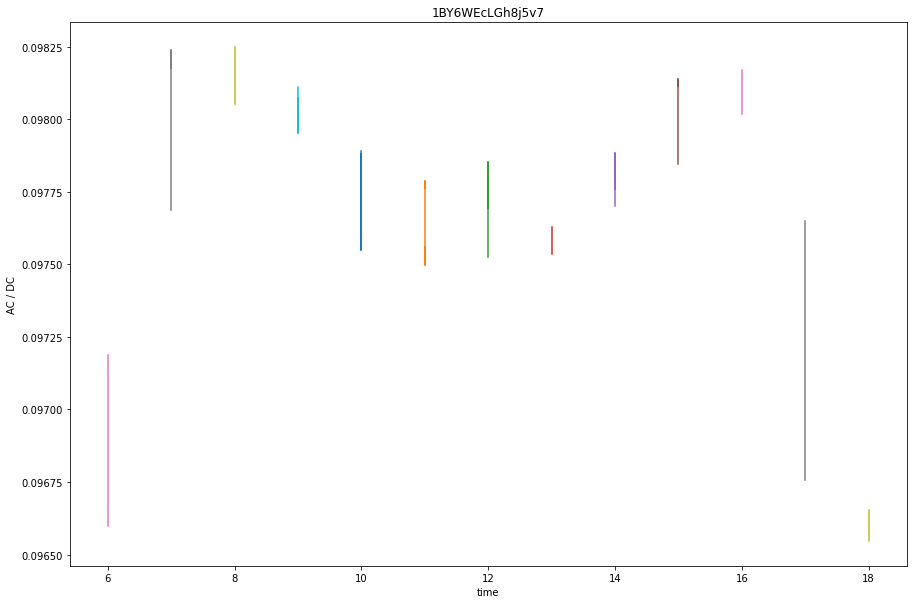

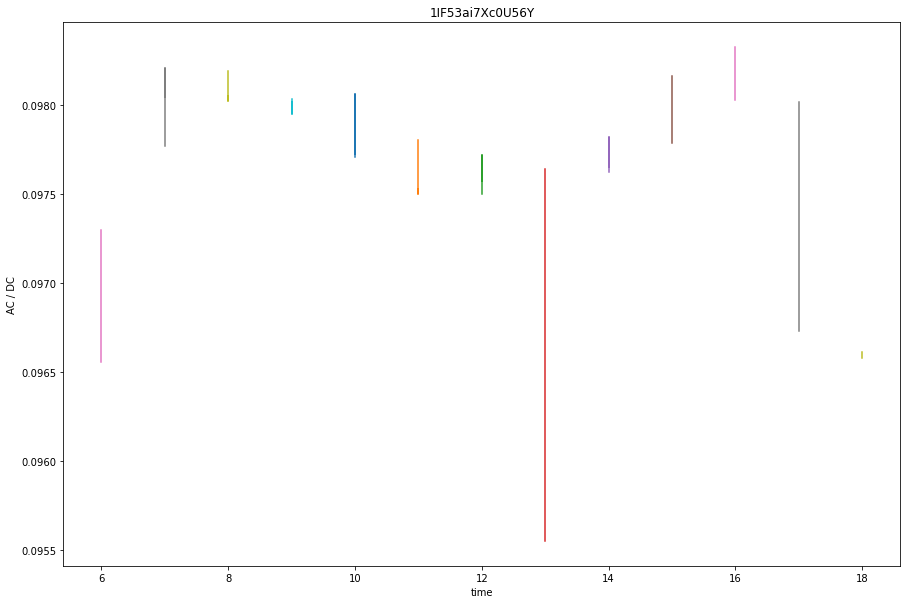

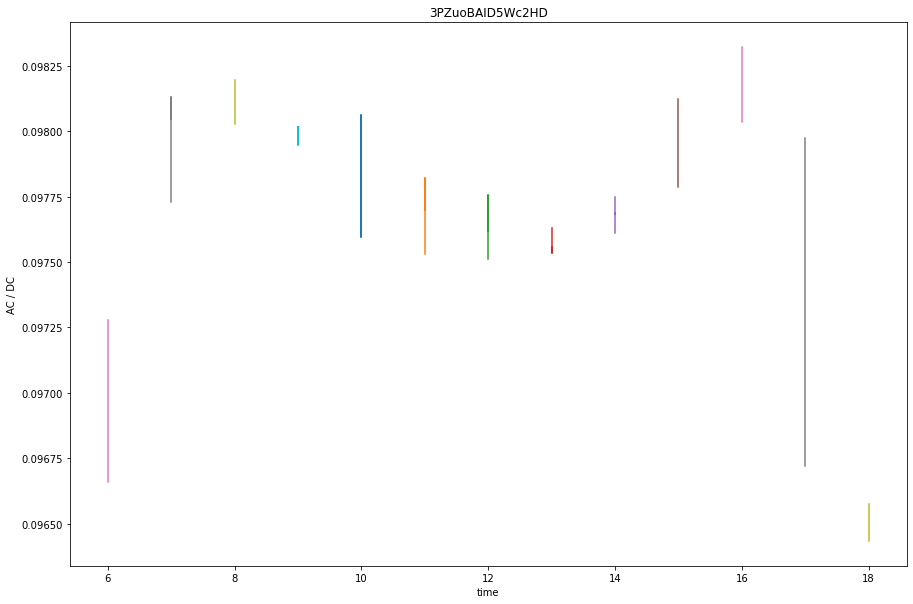

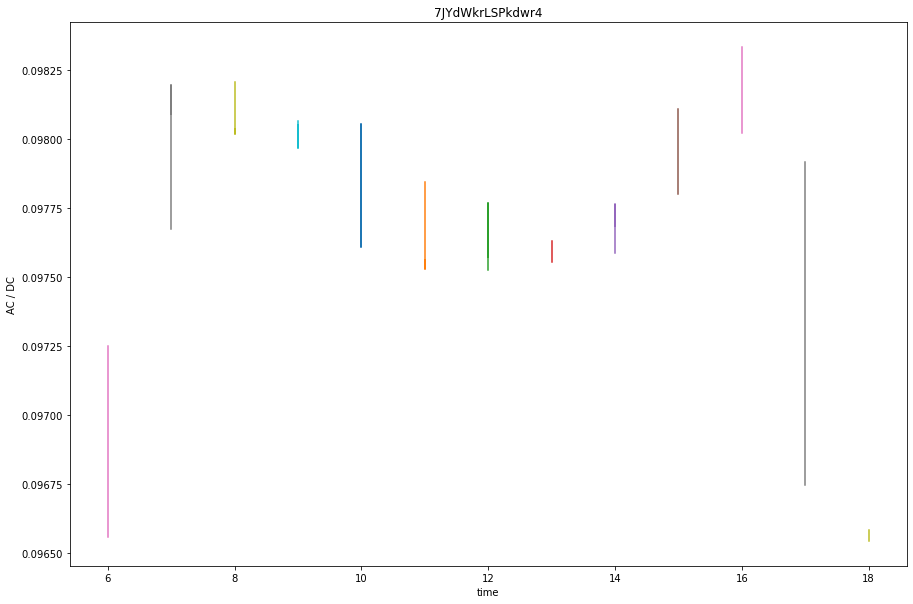

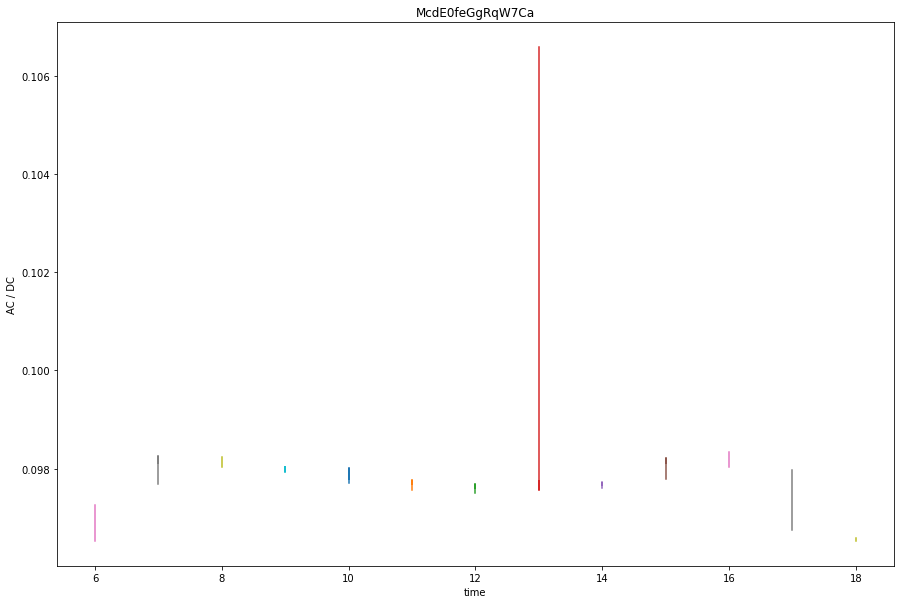

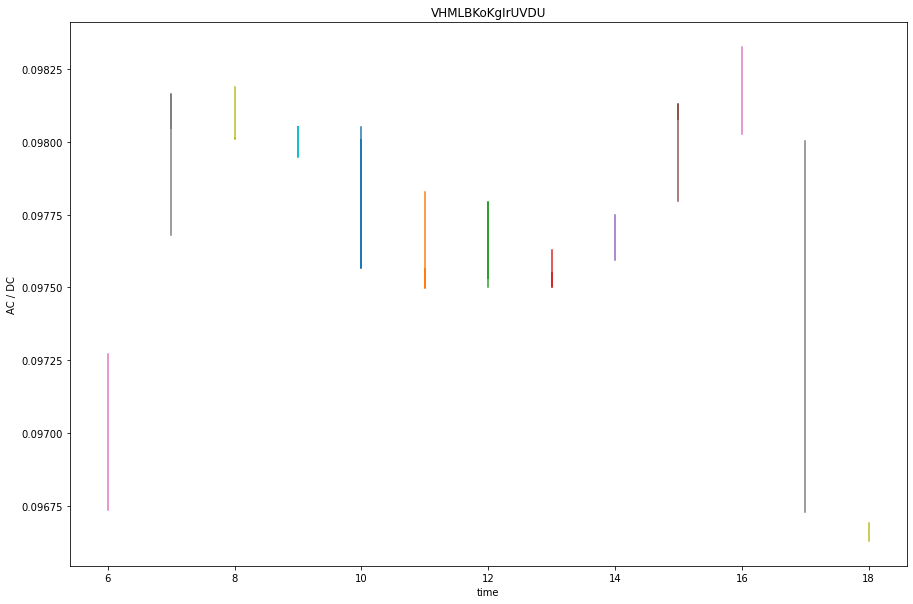

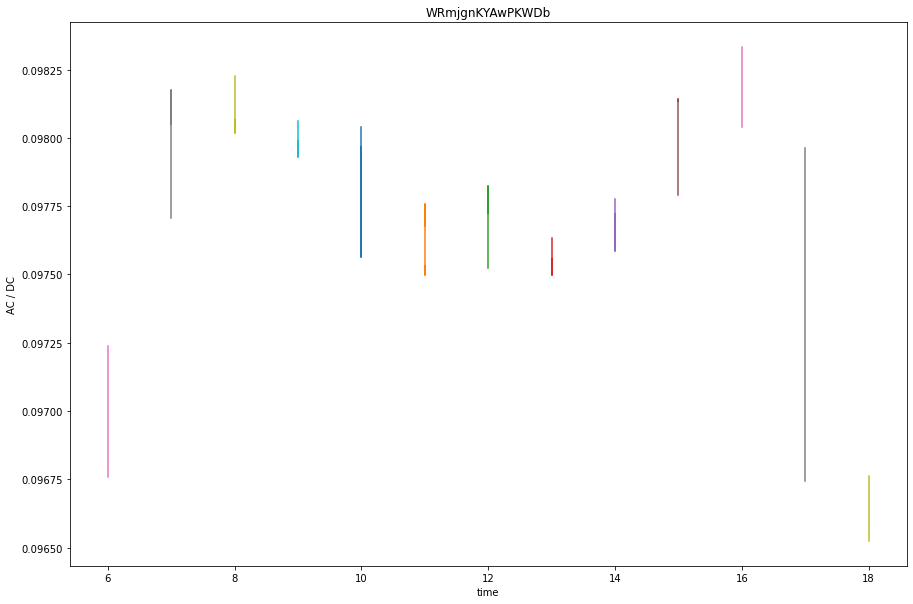

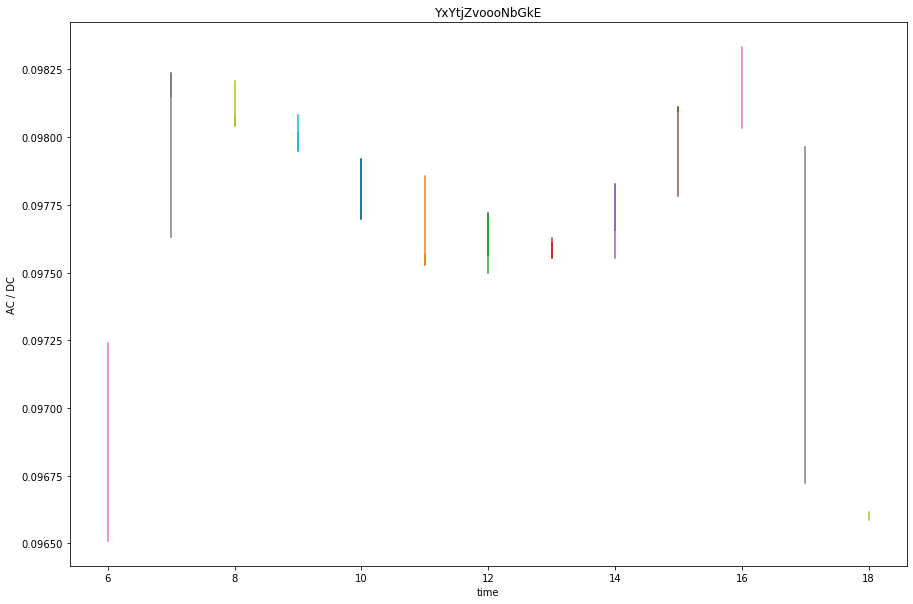

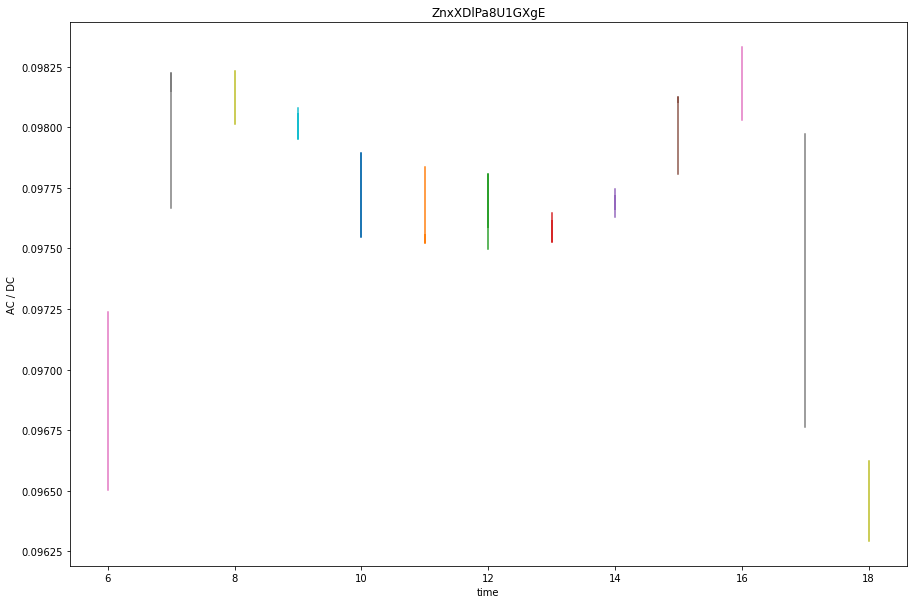

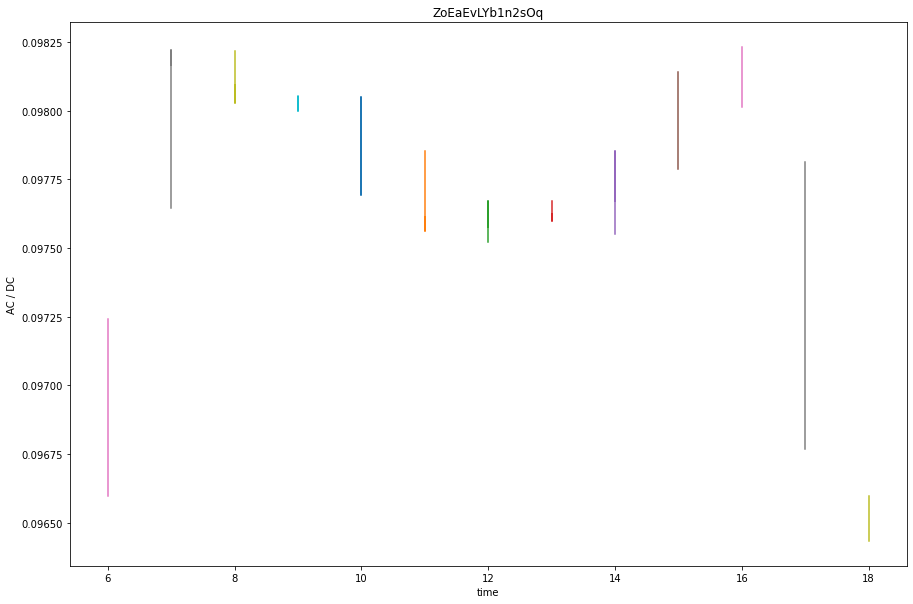

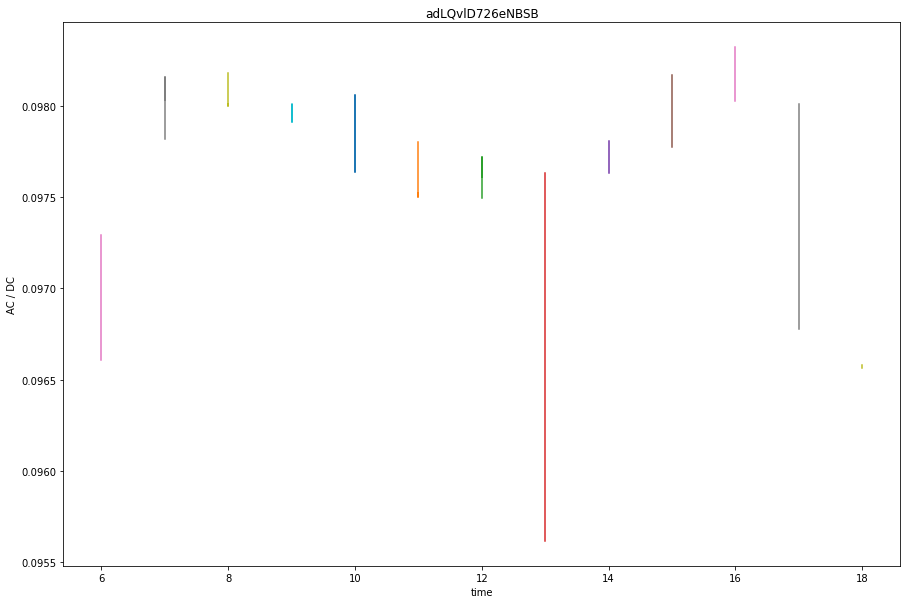

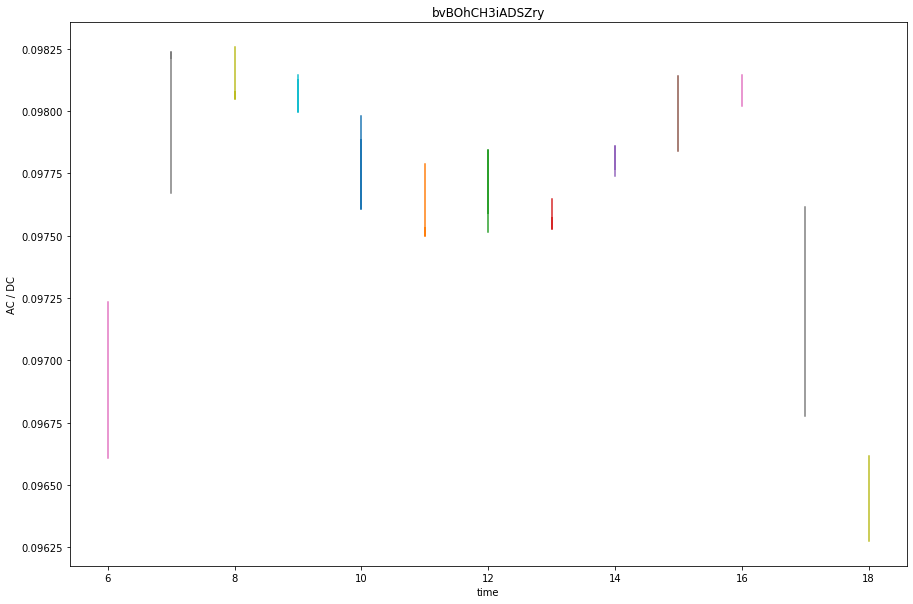

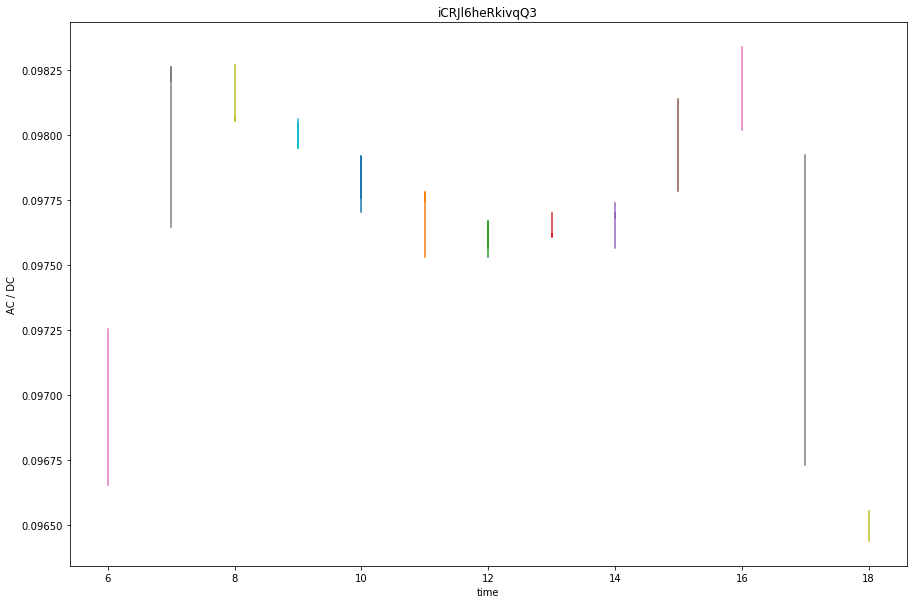

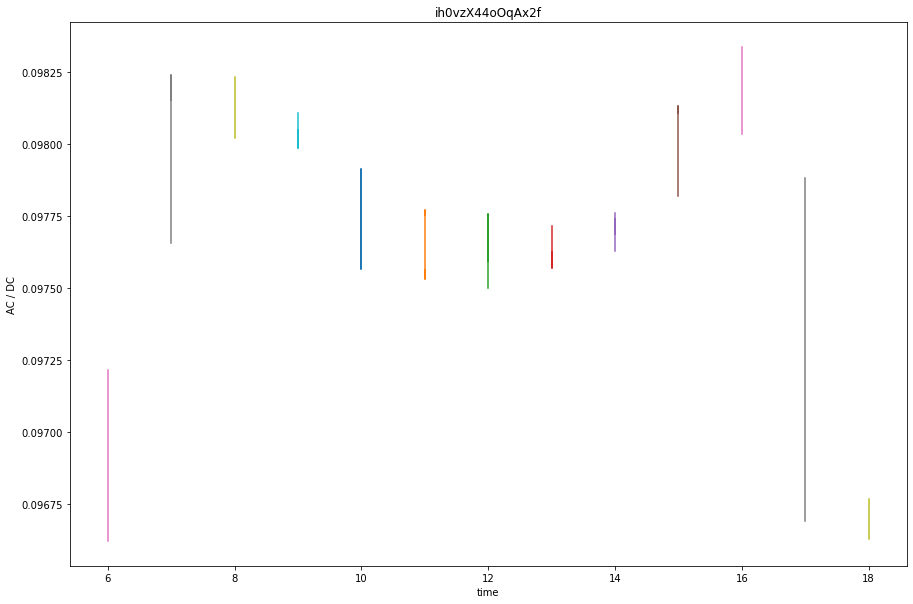

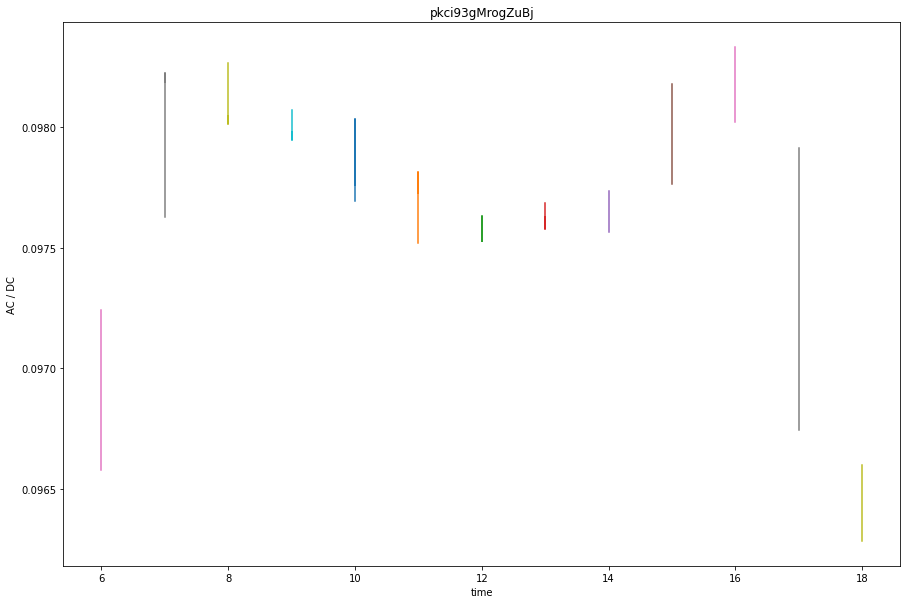

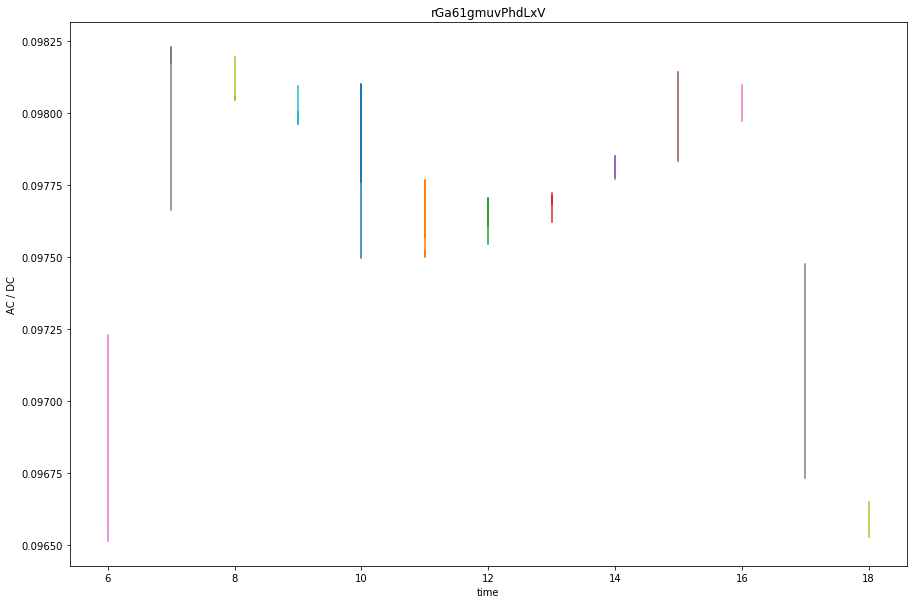

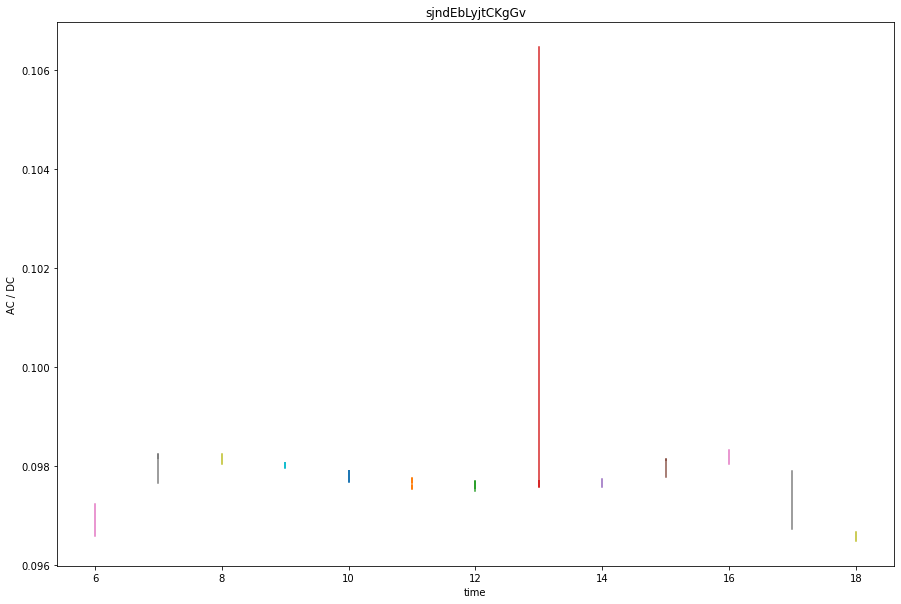

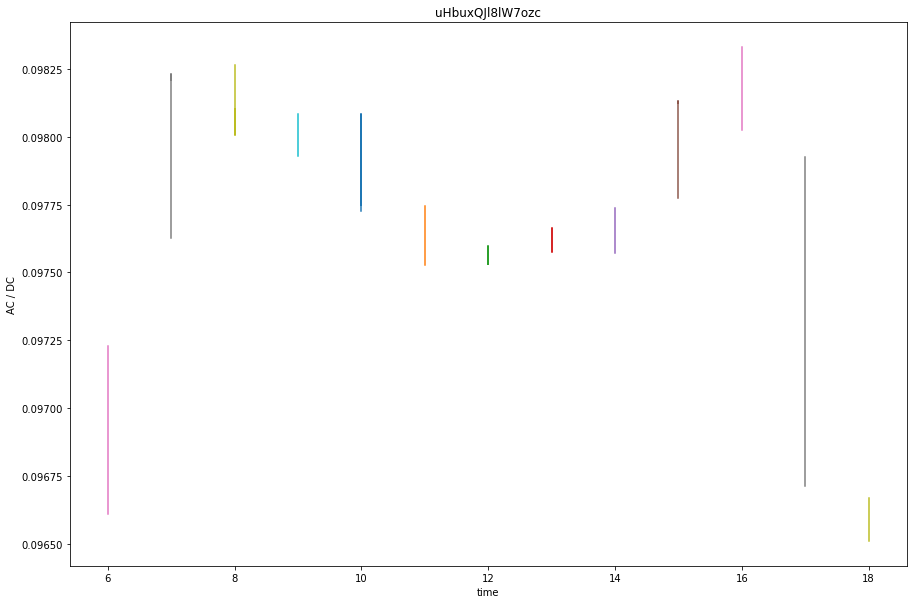

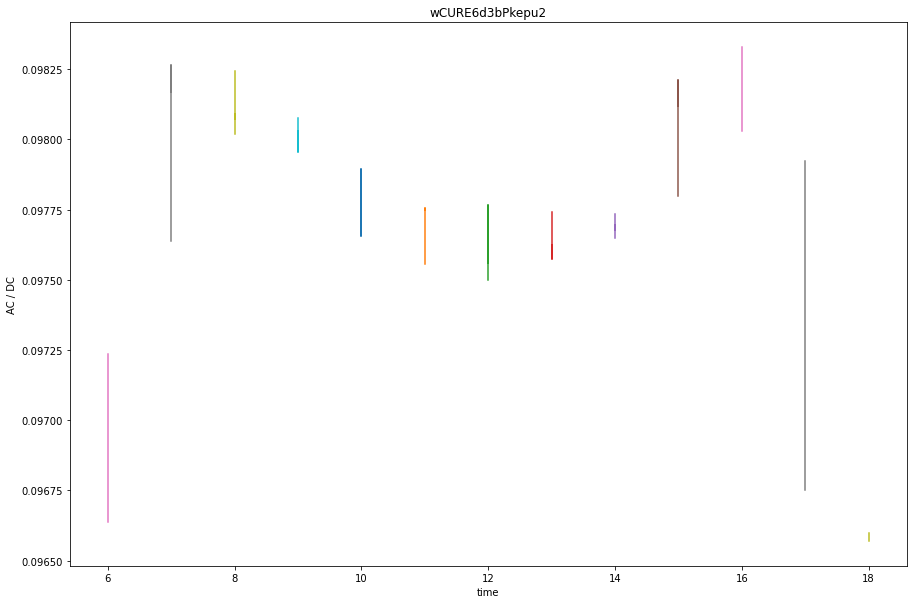

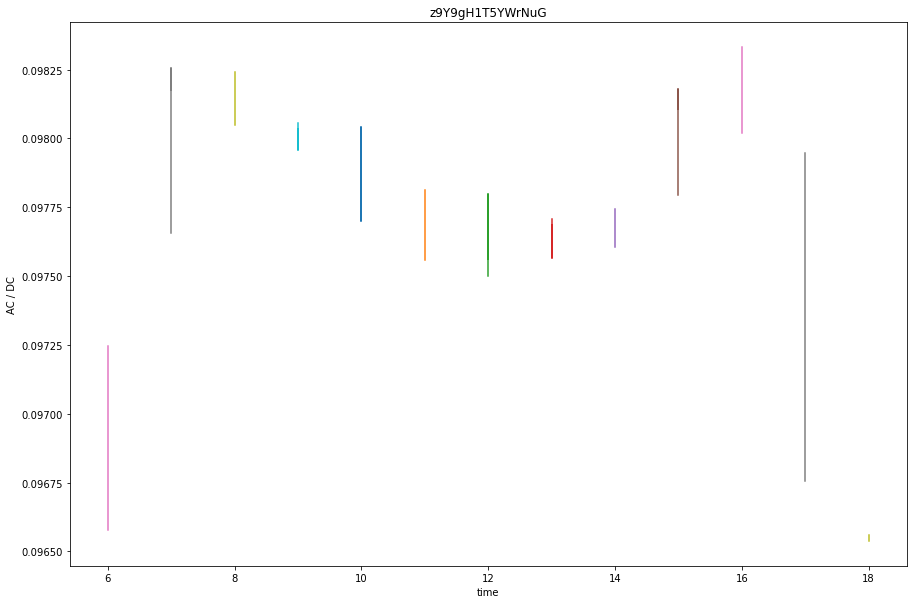

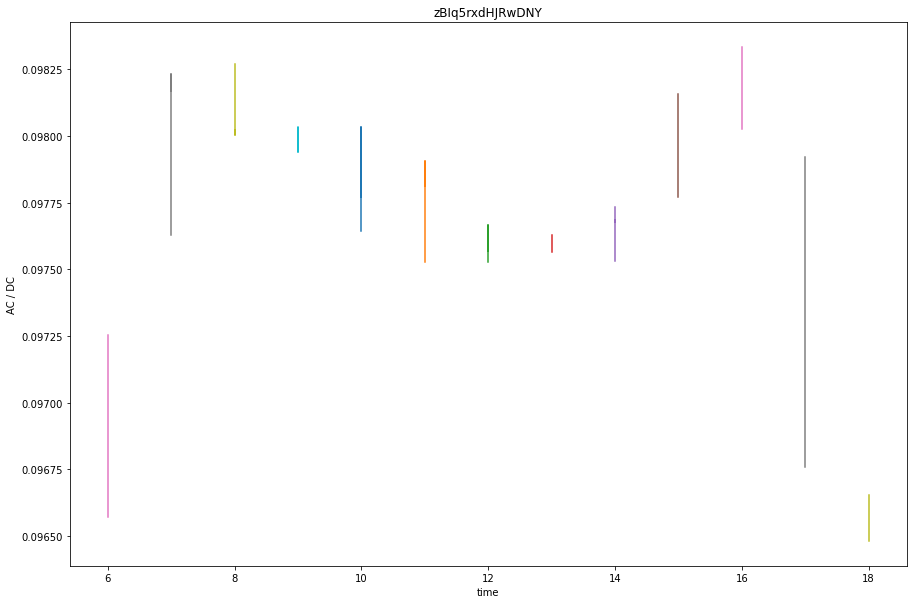

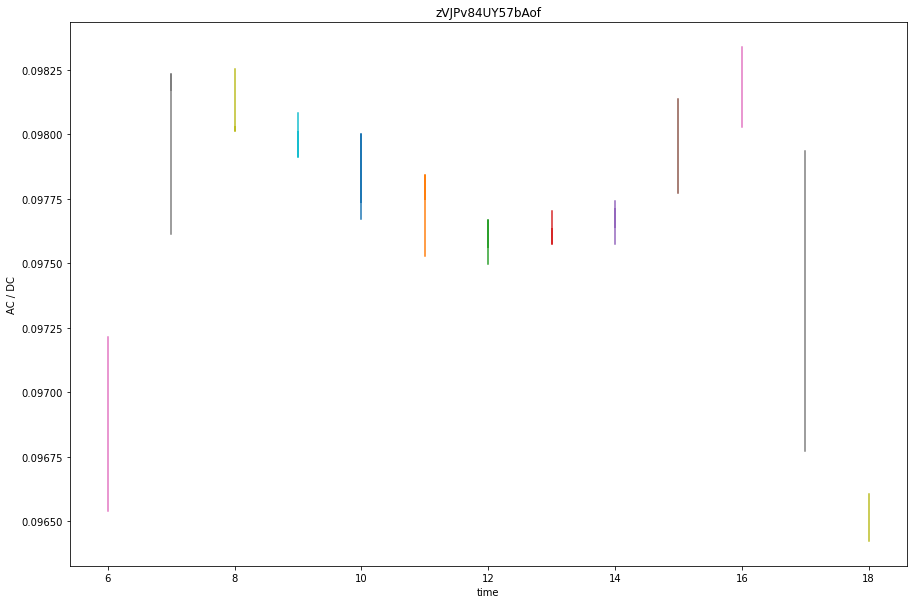

In [36]:
for i, source_key in day143.groupby(day143.SOURCE_KEY):
    plt.figure(figsize=(15, 10))
    for a, b in source_key.groupby(source_key.HOUR):
        ACDC = b.AC_POWER / b.DC_POWER
        plt.plot(b.HOUR, ACDC)
    plt.xlabel('time')
    plt.ylabel('AC / DC')
    plt.title(i)
    plt.show()

The time of day 143 where the outliers occur is 13, and the inverter is McdEOfeGgRqW7Ca

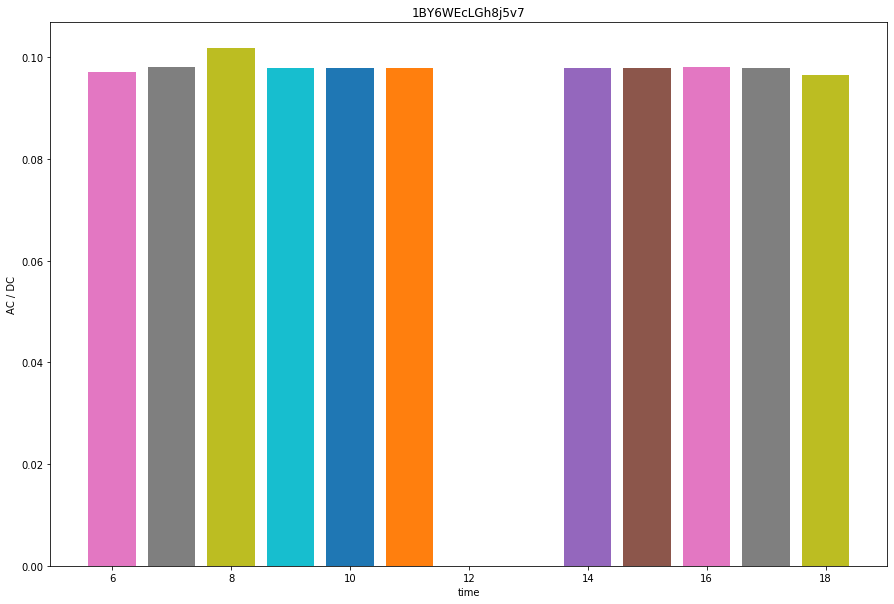

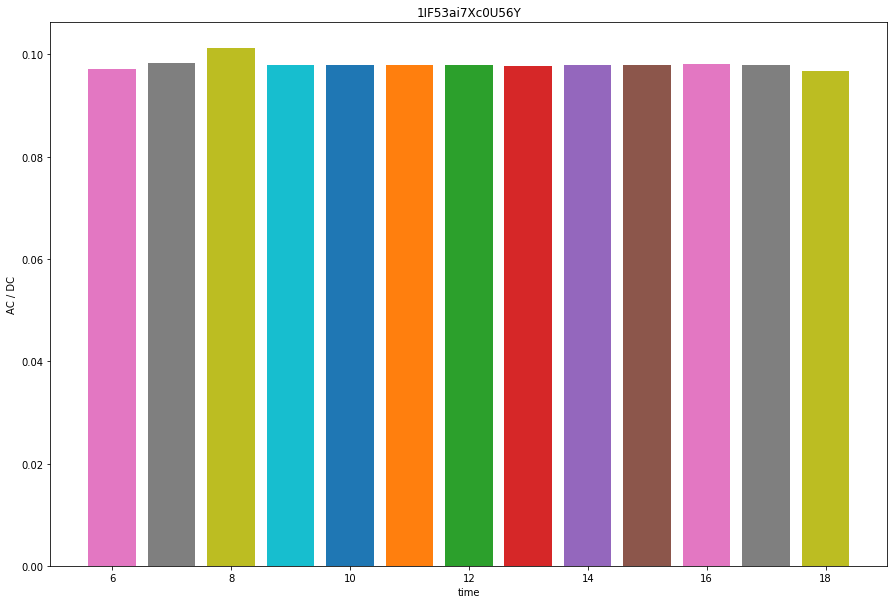

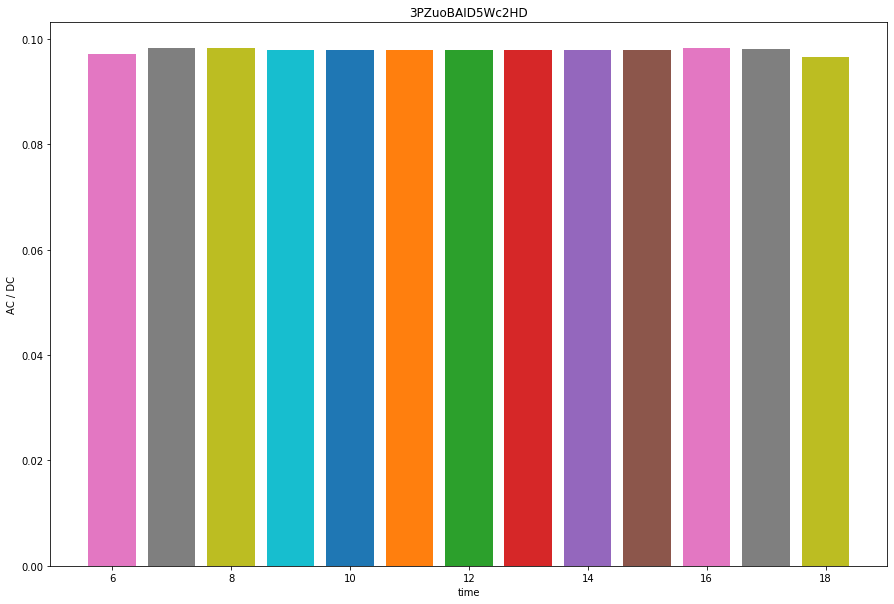

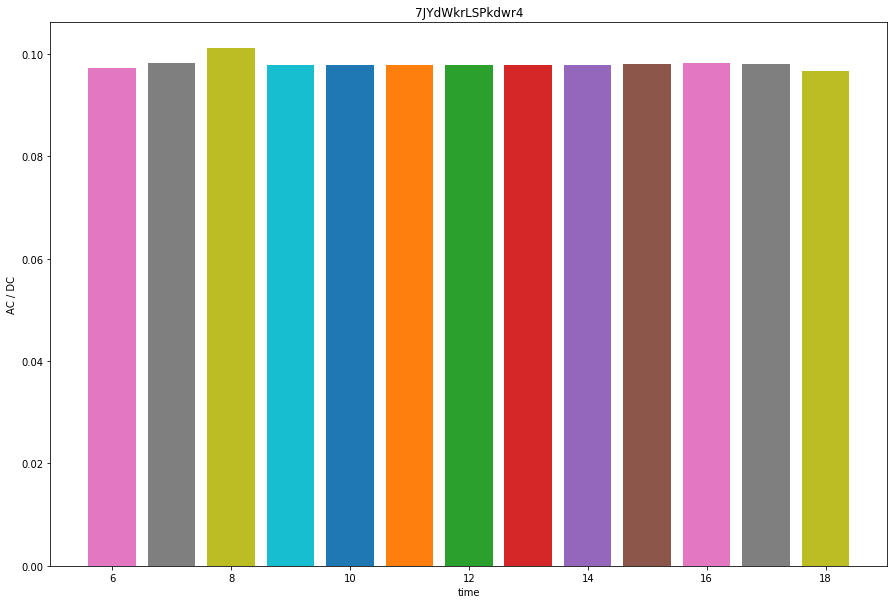

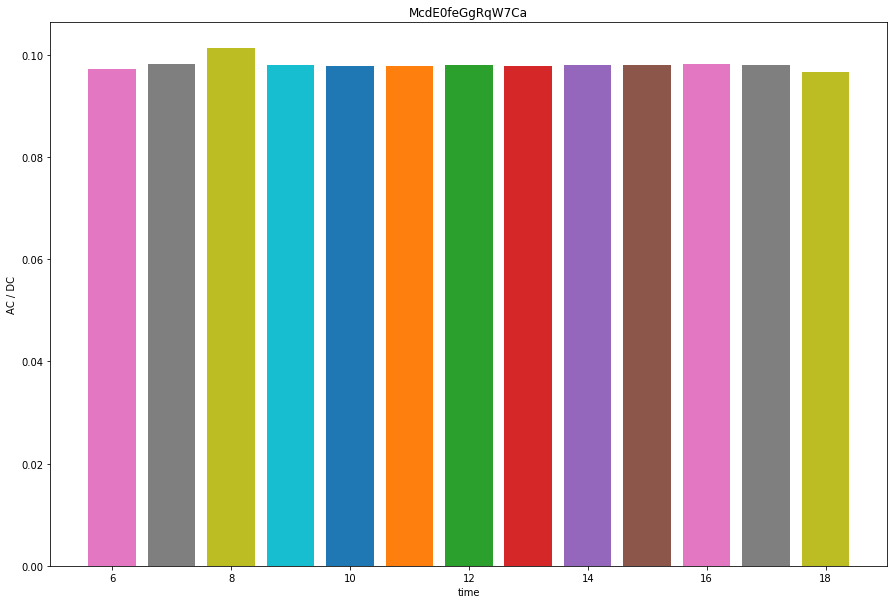

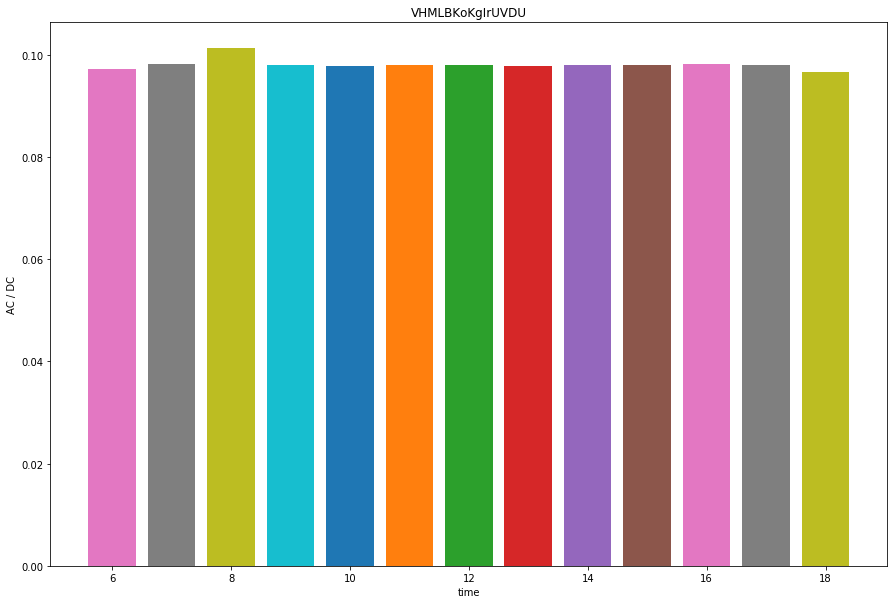

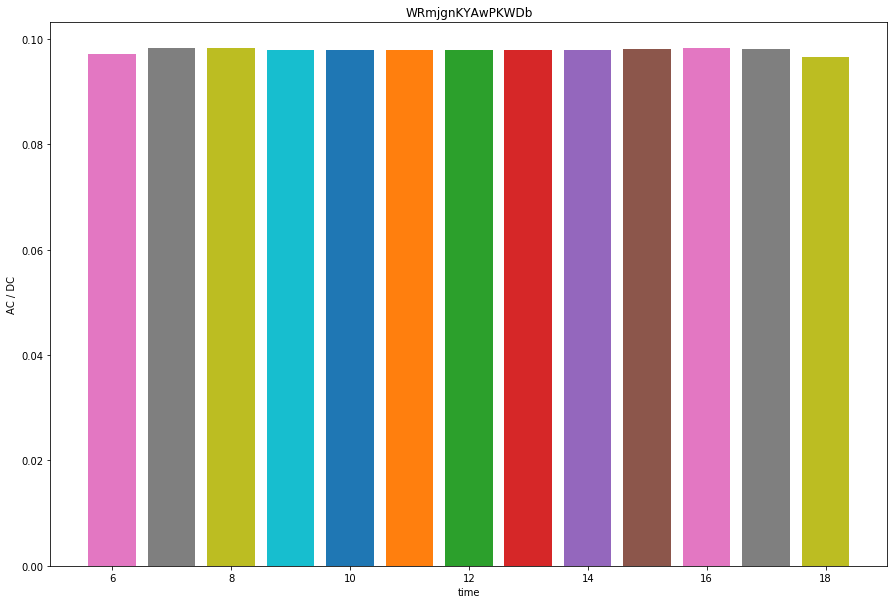

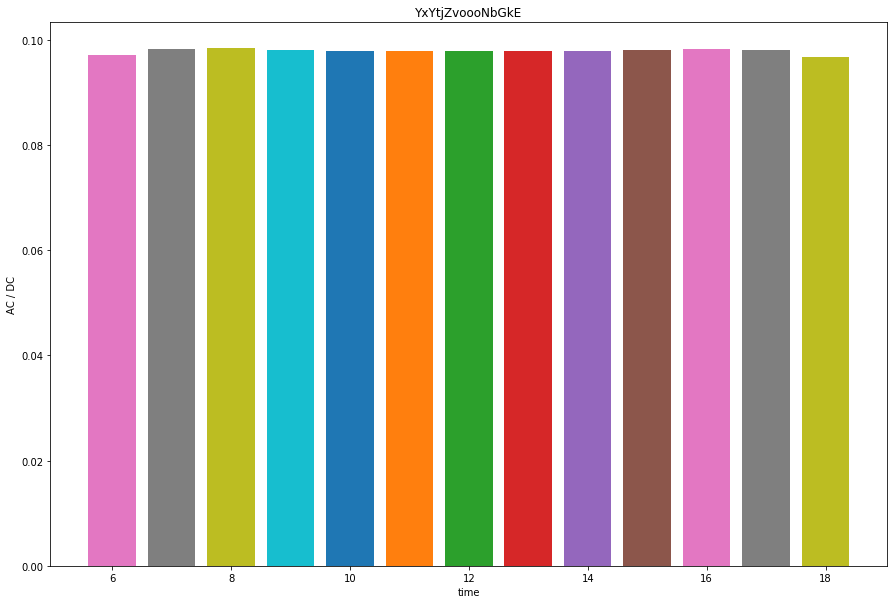

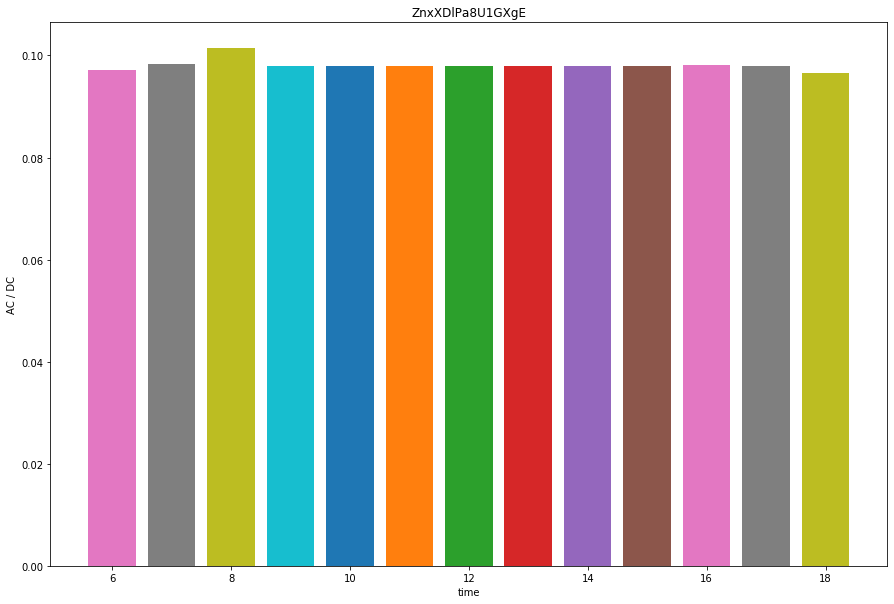

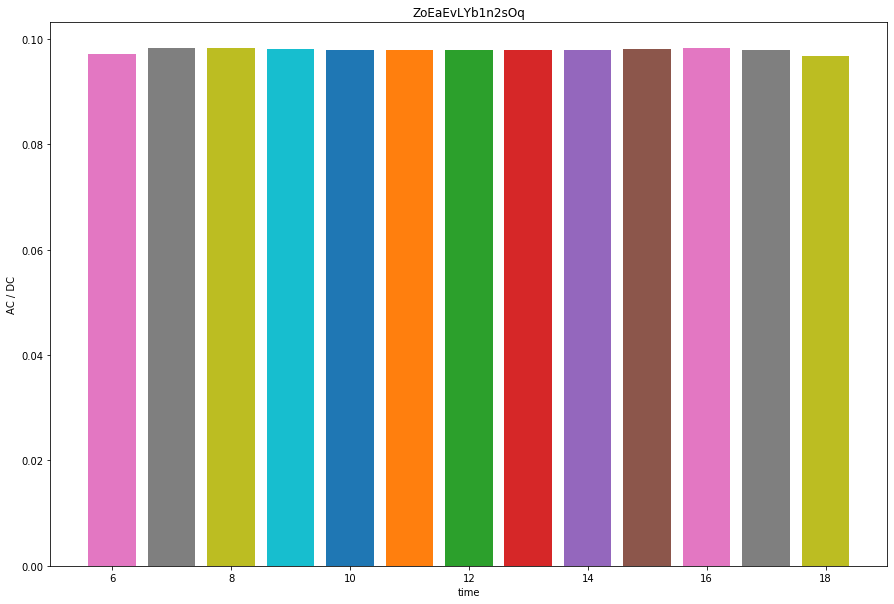

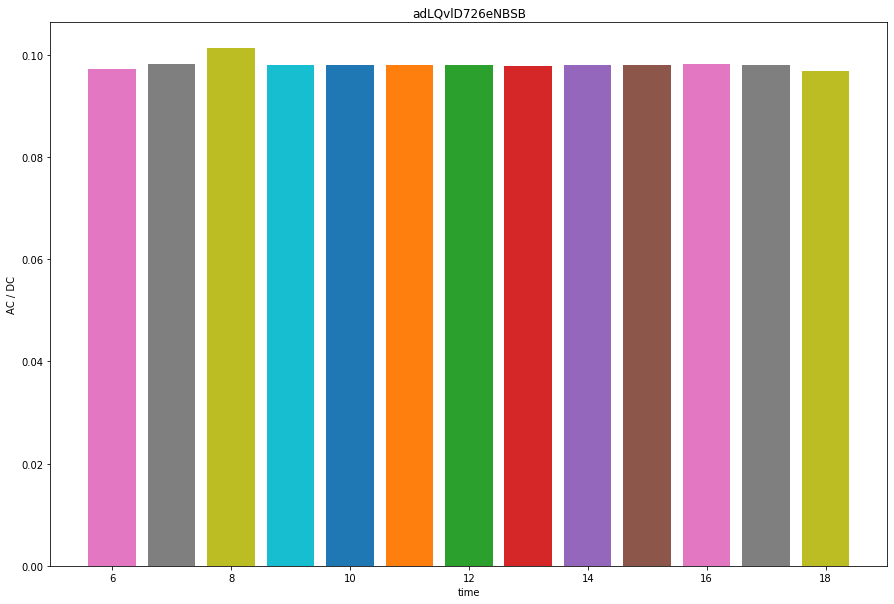

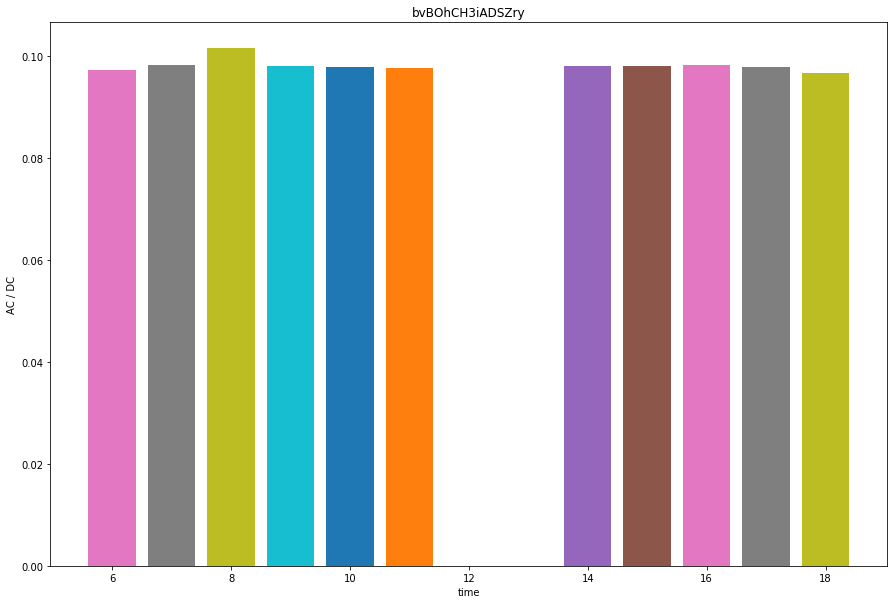

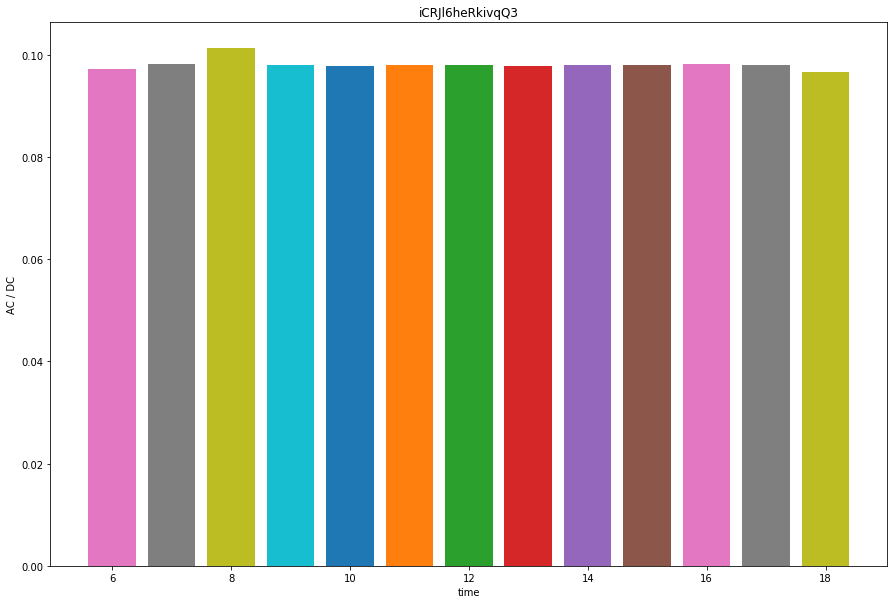

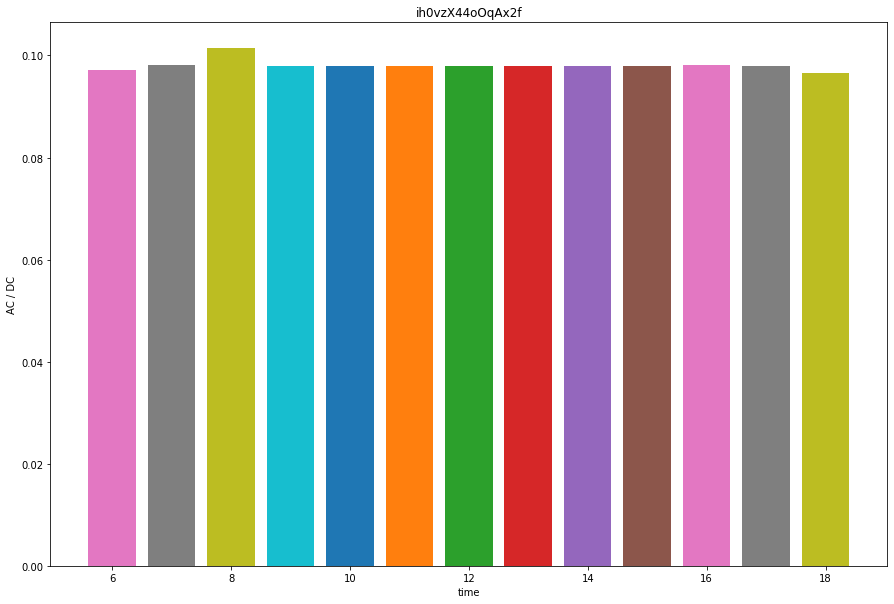

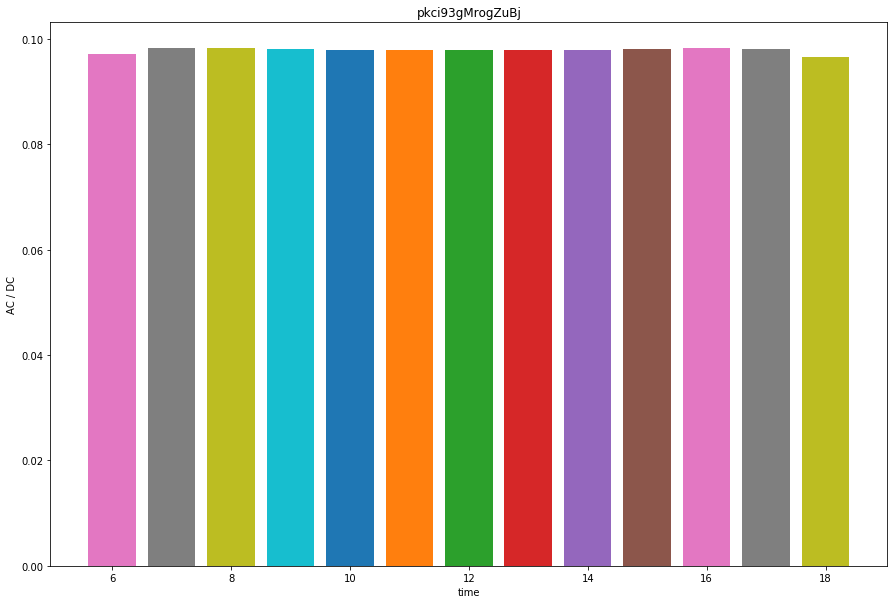

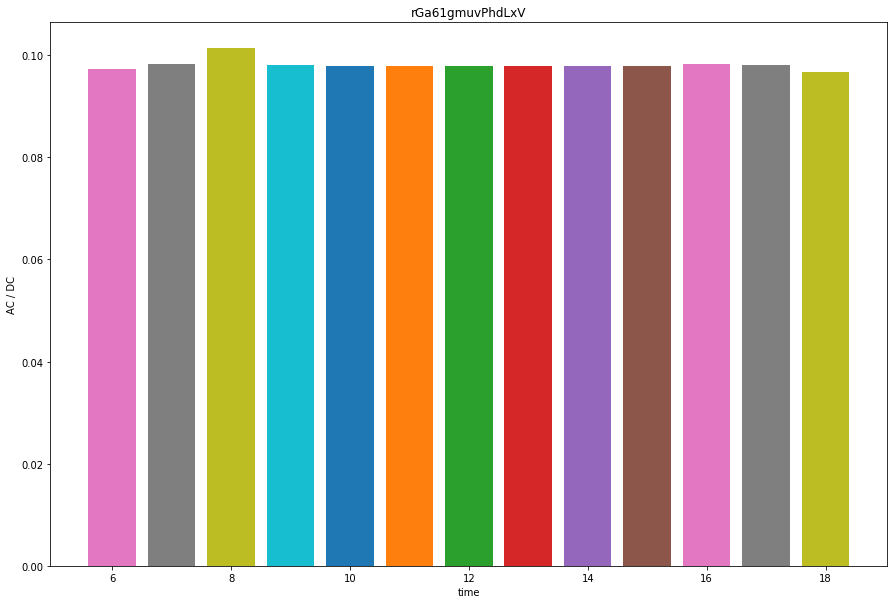

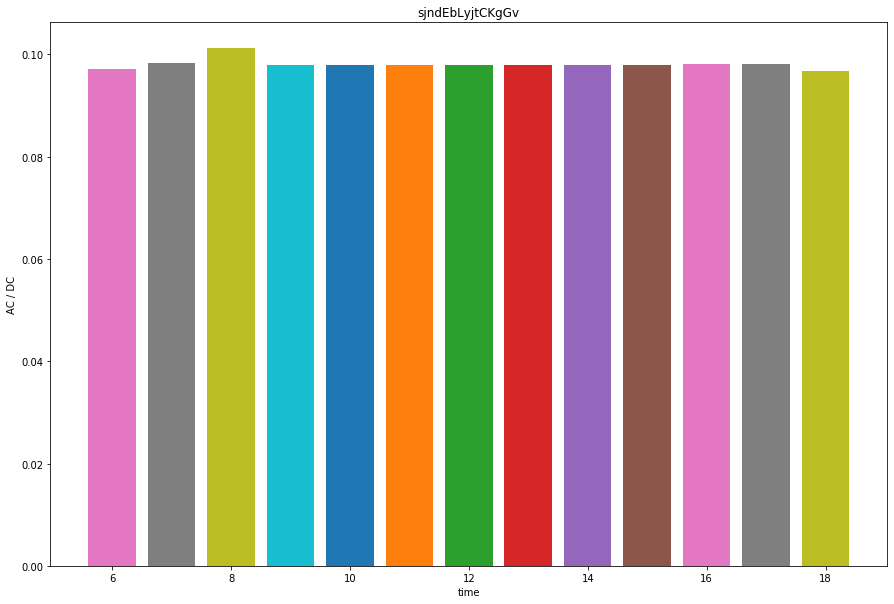

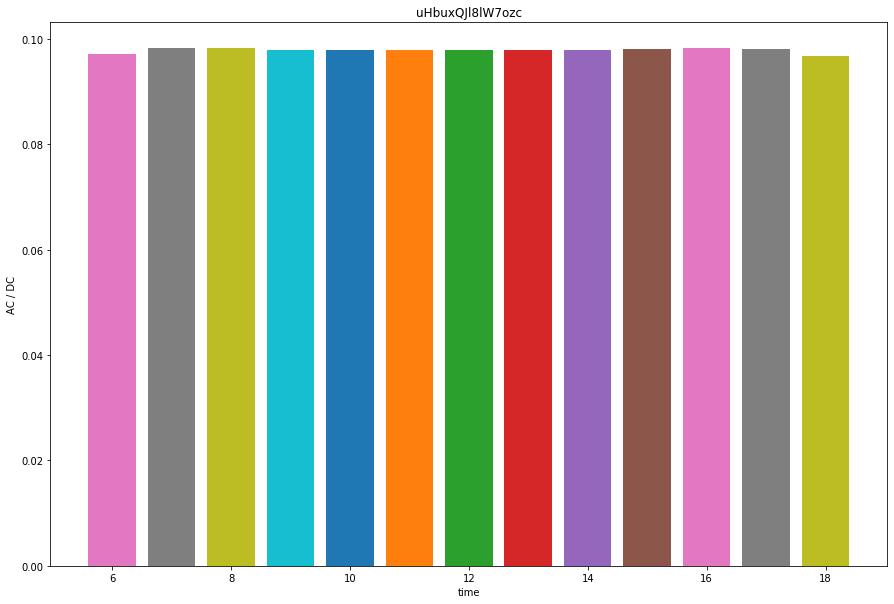

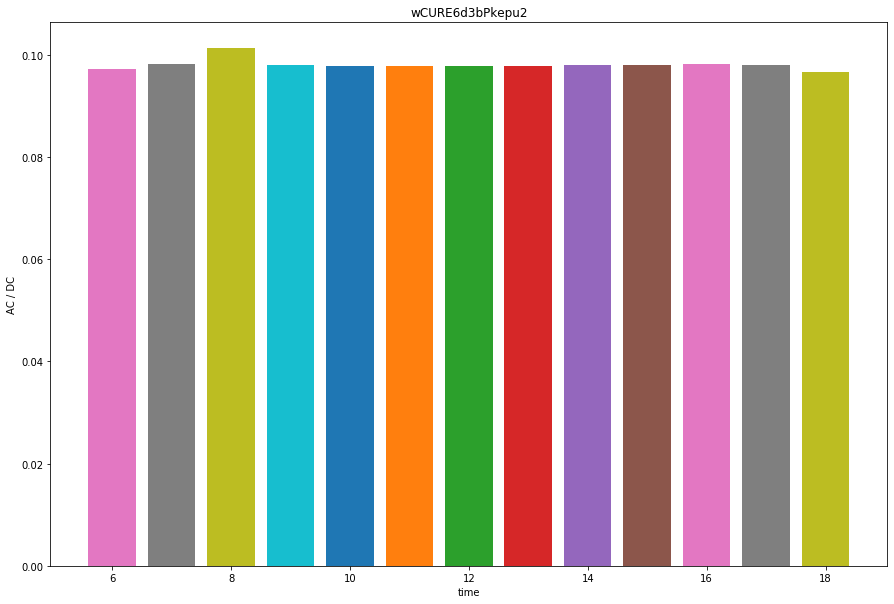

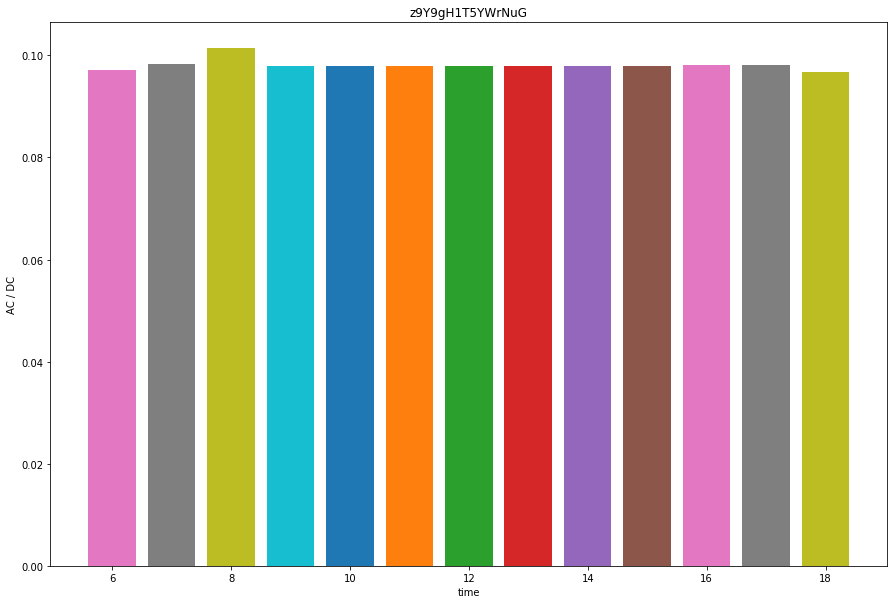

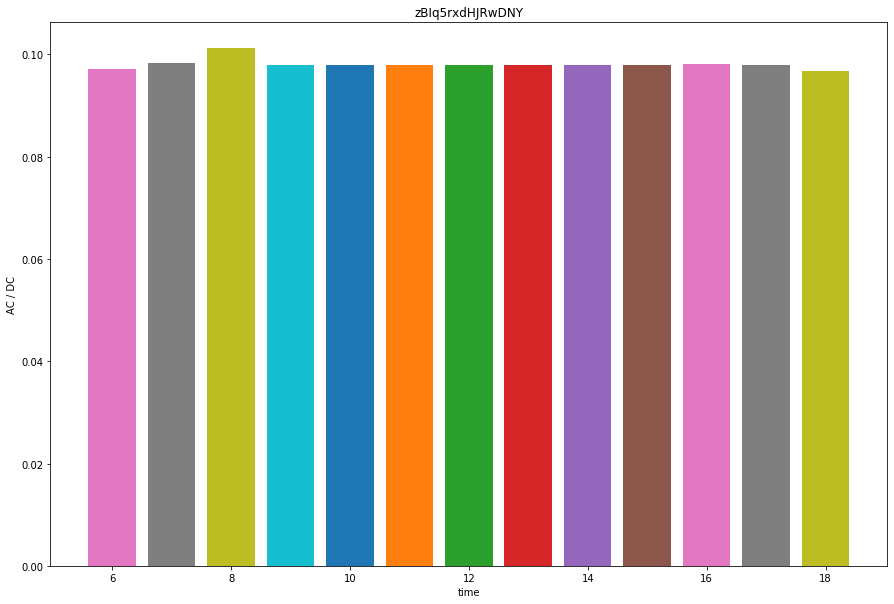

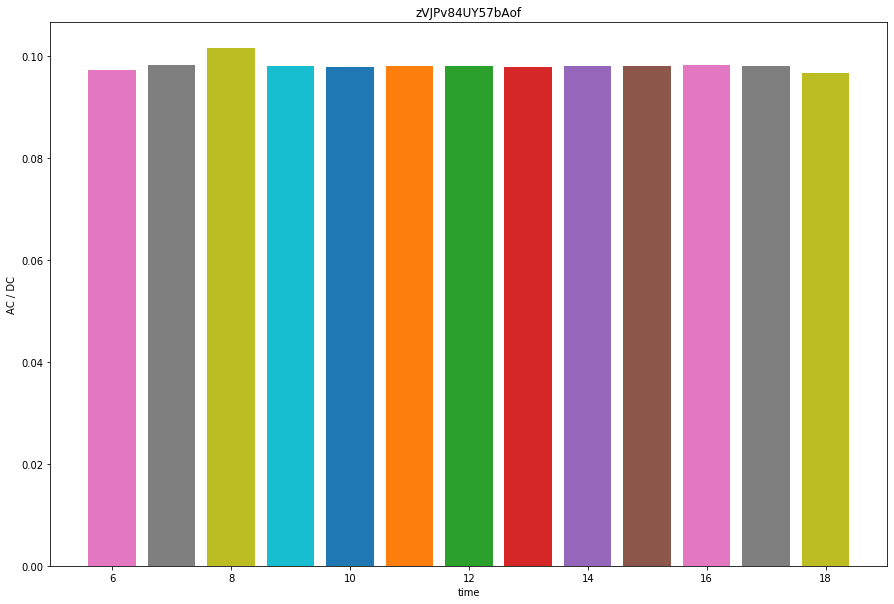

In [31]:
for i, source_key in day166.groupby(day166.SOURCE_KEY):
    plt.figure(figsize=(15, 10))
    for a, b in source_key.groupby(source_key.HOUR):
        ACDC = b.AC_POWER / b.DC_POWER
        plt.bar(b.HOUR, ACDC)
    plt.xlabel('time')
    plt.ylabel('AC / DC')
    plt.title(i)
    plt.show()

We notice that there are empty spaces during between the times 11 and 14, and if we take a look at our data, we can see that for 2 of the inverters, the AC and DC values are 0

In [32]:
inv_1BY6WEcLGh8j5v7=day166[day166.SOURCE_KEY=='1BY6WEcLGh8j5v7']
inv_1BY6WEcLGh8j5v7[ 10 < day166.HOUR].head(15)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY,TIME,HOUR
61342,2020-06-14 11:00:00,4135001,1BY6WEcLGh8j5v7,2155.375000,210.900000,2393.625000,6466056.625,166,11:00:00,11
61364,2020-06-14 11:15:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,11:15:00,11
61386,2020-06-14 11:30:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,11:30:00,11
61408,2020-06-14 11:45:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,11:45:00,11
61430,2020-06-14 12:00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,12:00:00,12
61452,2020-06-14 12:15:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,12:15:00,12
61474,2020-06-14 12:30:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,12:30:00,12
61496,2020-06-14 12:45:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,12:45:00,12
61518,2020-06-14 13:00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,13:00:00,13
61540,2020-06-14 13:15:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,13:15:00,13


In [33]:
inv_bvBOhCH3iADSZry=day166[day166.SOURCE_KEY=='bvBOhCH3iADSZry']
inv_bvBOhCH3iADSZry[ 10 < day166.HOUR].head(15)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY,TIME,HOUR
61353,2020-06-14 11:00:00,4135001,bvBOhCH3iADSZry,2474.500000,241.637500,2368.000000,6520010.000,166,11:00:00,11
61375,2020-06-14 11:15:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,11:15:00,11
61397,2020-06-14 11:30:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,11:30:00,11
61419,2020-06-14 11:45:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,11:45:00,11
61441,2020-06-14 12:00:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,12:00:00,12
61463,2020-06-14 12:15:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,12:15:00,12
61485,2020-06-14 12:30:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,12:30:00,12
61507,2020-06-14 12:45:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,12:45:00,12
61529,2020-06-14 13:00:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,13:00:00,13
61551,2020-06-14 13:15:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,13:15:00,13


In [34]:
day166_w=weather_data[weather_data['DAY']==166]
day166_w[ 10 < day166_w.HOUR].head(20)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,TIME,HOUR
2842,2020-06-14 11:00:00,4135001,HmiyD2TTLFNqkNe,27.081069,47.275213,0.640661,166,11:00:00,11
2843,2020-06-14 11:15:00,4135001,HmiyD2TTLFNqkNe,26.948706,43.949264,0.650214,166,11:15:00,11
2844,2020-06-14 11:30:00,4135001,HmiyD2TTLFNqkNe,26.847070,46.031458,0.662152,166,11:30:00,11
2845,2020-06-14 11:45:00,4135001,HmiyD2TTLFNqkNe,25.923041,38.486489,0.426235,166,11:45:00,11
2846,2020-06-14 12:00:00,4135001,HmiyD2TTLFNqkNe,25.218286,37.815925,0.492024,166,12:00:00,12
2847,2020-06-14 12:15:00,4135001,HmiyD2TTLFNqkNe,24.932560,36.606858,0.472765,166,12:15:00,12
2848,2020-06-14 12:30:00,4135001,HmiyD2TTLFNqkNe,24.945296,35.614831,0.454945,166,12:30:00,12
2849,2020-06-14 12:45:00,4135001,HmiyD2TTLFNqkNe,25.431061,37.157001,0.519269,166,12:45:00,12
2850,2020-06-14 13:00:00,4135001,HmiyD2TTLFNqkNe,25.379936,34.780682,0.576180,166,13:00:00,13
2851,2020-06-14 13:15:00,4135001,HmiyD2TTLFNqkNe,25.898873,42.364294,0.734369,166,13:15:00,13


We can see that on day 166, from 11 oclock till 14, the value of AC and DC of the 2 inverters '1BY6WEcLGh8j5v7' and 'bvBOhCH3iADSZry' are 0, but we also see that the irradiation, module and amient temperatures have acceptale values. This could mean that there was a misfunction with the inverters.

# Correlations

## Correlation coefficient of irradiation and module temperature for each day. You will have an array of 30 coefficients for 30 days. Plot the distribution of these coefficients

In [35]:
mod_irr = []
for a, b in weather_data.groupby(weather_data['DAY']):
    c = b['IRRADIATION'].corr(b['MODULE_TEMPERATURE'])
    mod_irr.append(c)

mod_irr = pd.DataFrame(data=np.array(mod_irr), columns=['CORRELATION'])
mod_irr['DAY'] = weather_data['DAY'].unique()
mod_irr.head()

,CORRELATION,DAY
0,0.951646,136
1,0.959582,137
2,0.973150,138
3,0.971743,139
4,0.976674,140


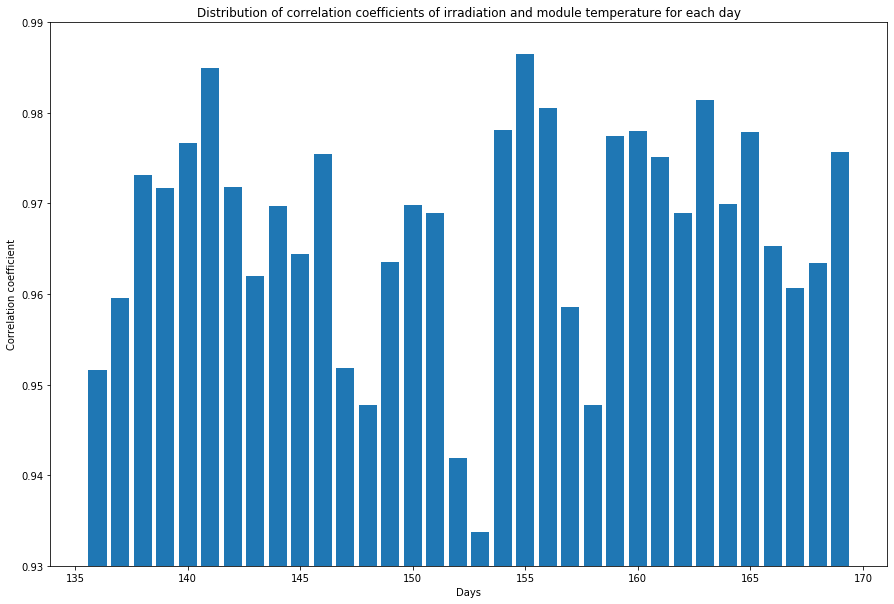

In [36]:
plt.figure(figsize=(15, 10))
plt.bar(mod_irr['DAY'], mod_irr['CORRELATION'])
plt.title('Distribution of correlation coefficients of irradiation and module temperature for each day')
plt.ylabel('Correlation coefficient')
plt.xlabel('Days')
plt.ylim(0.93,0.99)
plt.show()

The lowest correlation coefficients are on days 152 and 153, we will try to investigate the irradiation and module temperatues on those days

In [37]:
day152_w=weather_data[weather_data.DAY==152]
day153_w=weather_data[weather_data.DAY==153]
day155_w=weather_data[weather_data.DAY==155]

In [38]:
# plt.figure(figsize=(15, 10))
# for a, b in day152_w.groupby(day152_w.HOUR):
#     modir = b.IRRADIATION / b.MODULE_TEMPERATURE
#     plt.bar(b.HOUR, modir)
# plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


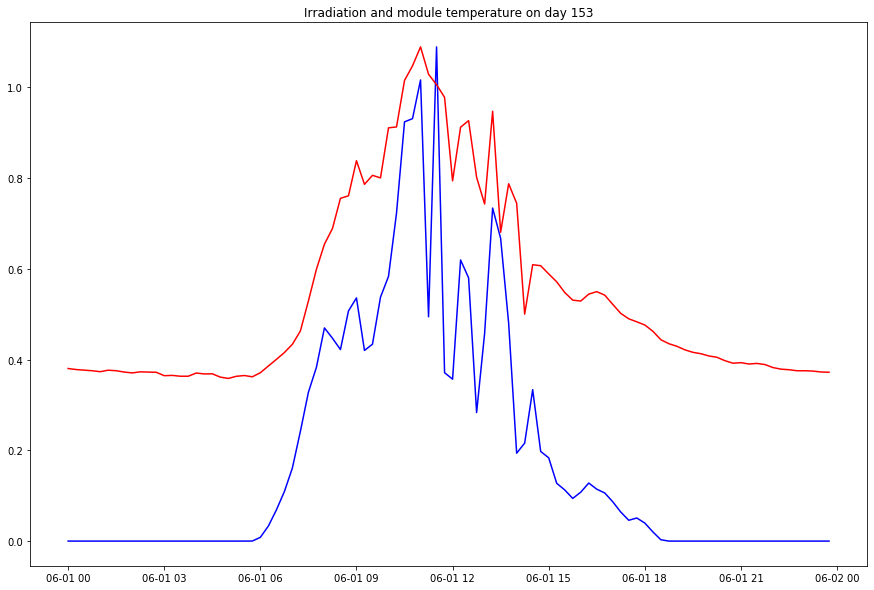

In [39]:
plt.figure(figsize=(15, 10))
scale = day153_w['IRRADIATION'].max() / day153_w['MODULE_TEMPERATURE'].max()
plt.plot(day153_w['DATE_TIME'], day153_w['IRRADIATION'], color='blue')
plt.plot(day153_w['DATE_TIME'], day153_w['MODULE_TEMPERATURE']* scale, color='red')
plt.title('Irradiation and module temperature on day 153')
plt.show()

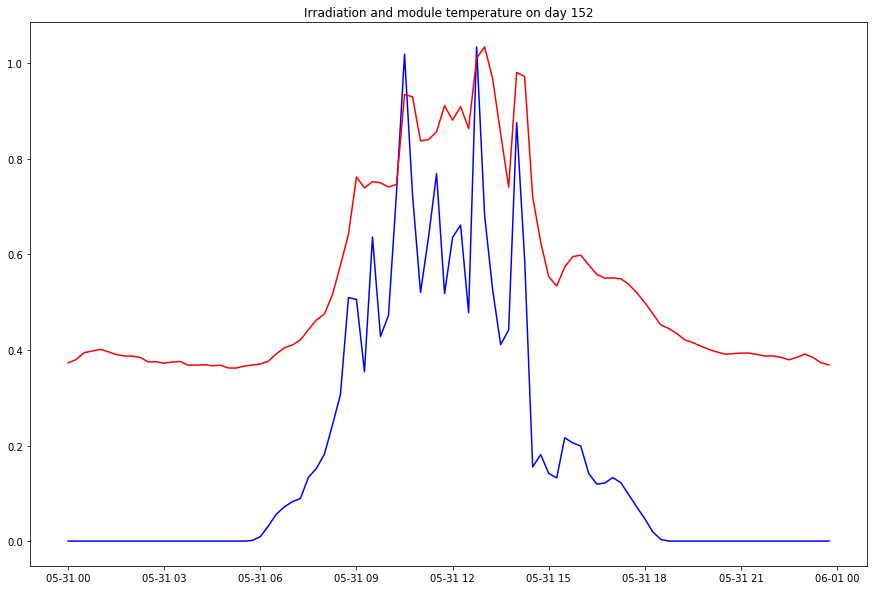

In [40]:
plt.figure(figsize=(15, 10))
scale = day152_w['IRRADIATION'].max() / day152_w['MODULE_TEMPERATURE'].max()
plt.plot(day152_w['DATE_TIME'], day152_w['IRRADIATION'], color='blue')
plt.plot(day152_w['DATE_TIME'], day152_w['MODULE_TEMPERATURE']* scale, color='red')
plt.title('Irradiation and module temperature on day 152')
plt.show()

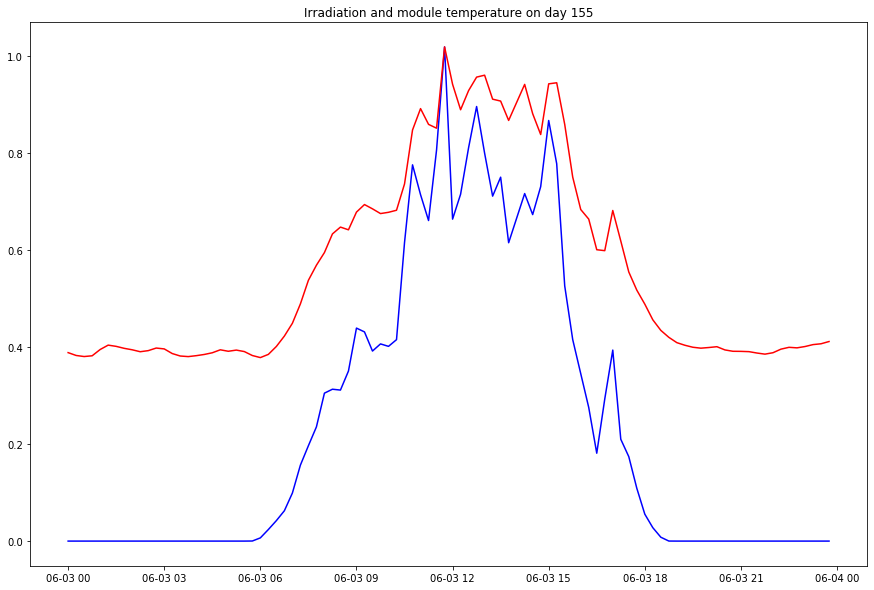

In [41]:

plt.figure(figsize=(15, 10))
scale = day155_w['IRRADIATION'].max() / day155_w['MODULE_TEMPERATURE'].max()
plt.plot(day155_w['DATE_TIME'], day155_w['IRRADIATION'], color='blue')
plt.plot(day155_w['DATE_TIME'], day155_w['MODULE_TEMPERATURE']* scale, color='red')
plt.title('Irradiation and module temperature on day 155')
plt.show()

Comparing the results of the 3 graphs (I chose the day 155 as a model, because the correlation between irradiation and module temperature is pretty high) , it seems like the reason behind the low correlation value is that during the day, some values of the irradiation are lower than the usual.